In [1]:
import pandas as pd

# Load the CSV file
file_path = 'dataraw.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its shape
print("Dataset shape (rows, columns):", data.shape)
print("\nFirst few rows of the dataset:")
print(data.head())

# Show the data types of each column
print("\nData types of each column:")
print(data.dtypes)

# Identify and count unique email IDs
if 'email' in data.columns:
    unique_emails = data['email'].nunique()
    print(f"\nNumber of unique email IDs: {unique_emails}")
else:
    print("\nColumn 'email' not found in the dataset.")

# Count of missing values in each column
missing_values = data.isnull().sum()
print("\nCount of missing values in each column:")
print(missing_values)

# Summary statistics for numerical columns
numerical_summary = data.describe()
print("\nSummary statistics for numerical columns:")
print(numerical_summary)



Dataset shape (rows, columns): (34, 153)

First few rows of the dataset:
      StartDate_x       EndDate_x  Status_x     IPAddress_x  Progress_x  \
0  12/18/23 15:06  12/18/23 15:21       0.0  155.246.151.34       100.0   
1  12/12/23 15:45  12/12/23 16:11       0.0  155.246.151.38        82.0   
2  12/12/23 15:45  12/12/23 16:58       0.0  155.246.151.34        82.0   
3  12/20/23 13:10  12/20/23 13:15       0.0  155.246.151.34       100.0   
4  12/20/23 13:50  12/20/23 13:54       0.0  155.246.151.34       100.0   

   Duration (in seconds)_x  Finished_x  RecordedDate_x       ResponseId_x  \
0                    951.0         1.0  12/18/23 15:21  R_7KuyBvZuzFDC8E7   
1                   1551.0         0.0  12/19/23 16:11  R_3oyKYuEbRcYlGNb   
2                   4389.0         0.0  12/19/23 16:58  R_2PuOybNrroDbbKM   
3                    261.0         1.0  12/20/23 13:15  R_7HN5Vh54r8nALHm   
4                    289.0         1.0  12/20/23 13:54  R_3HRIbsVLak4E9AB   

   RecipientL

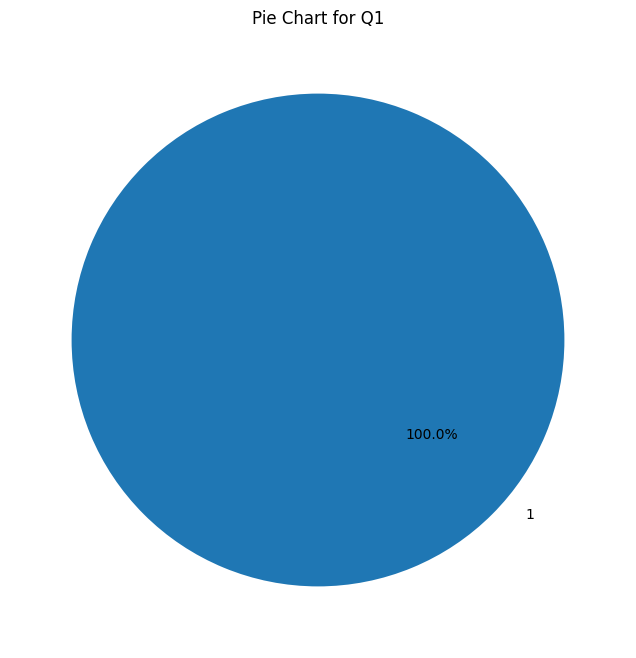

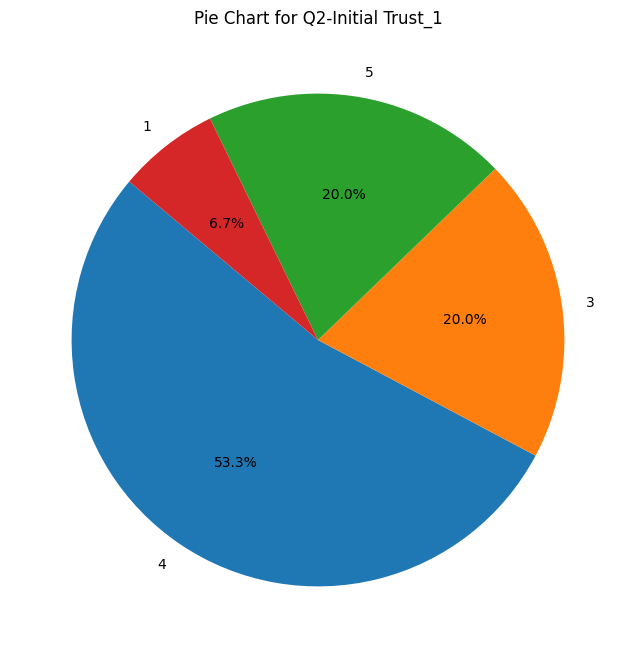

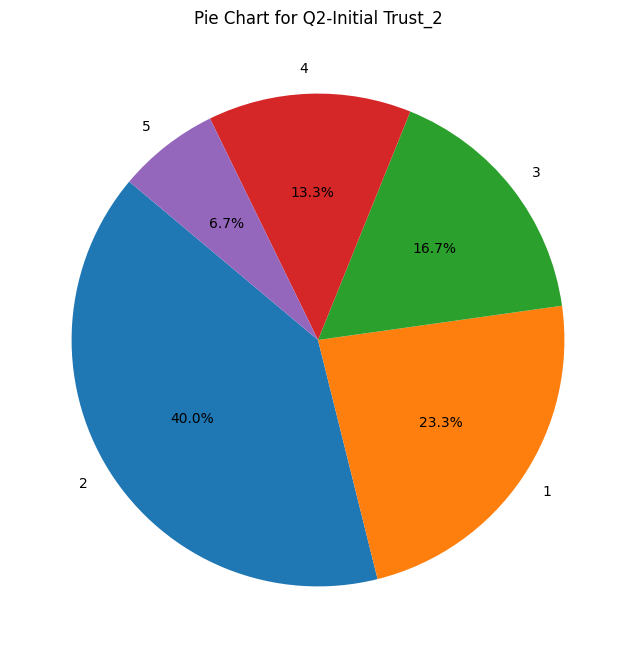

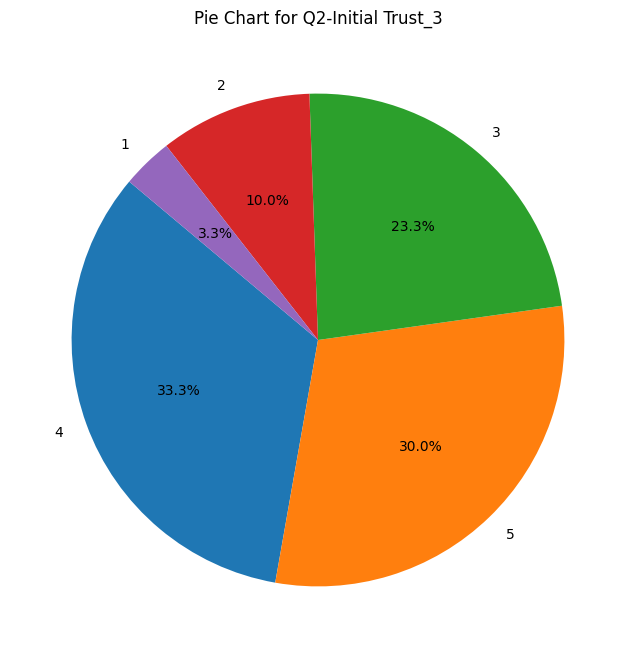

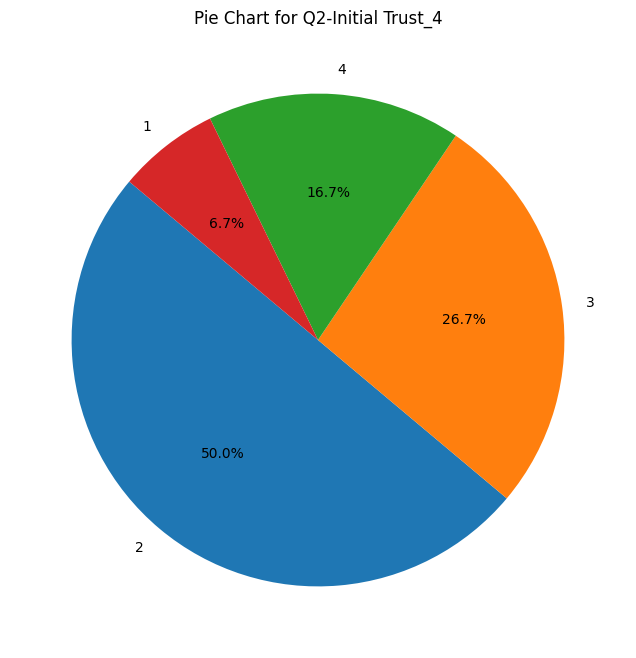

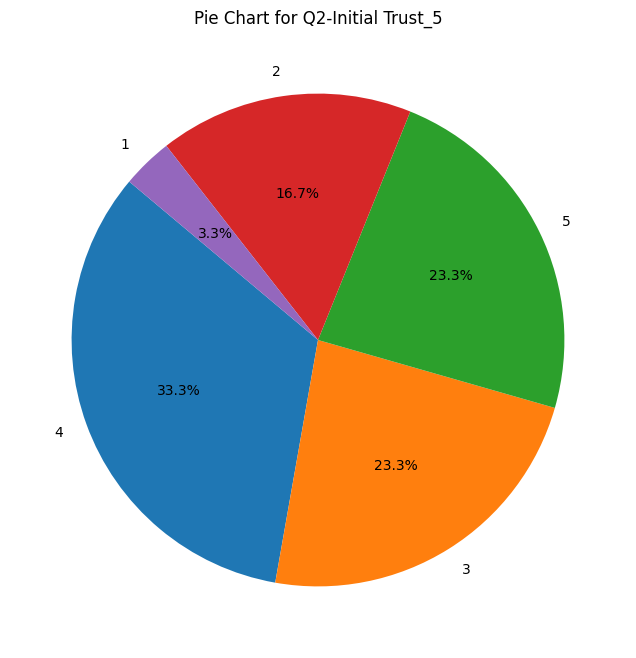

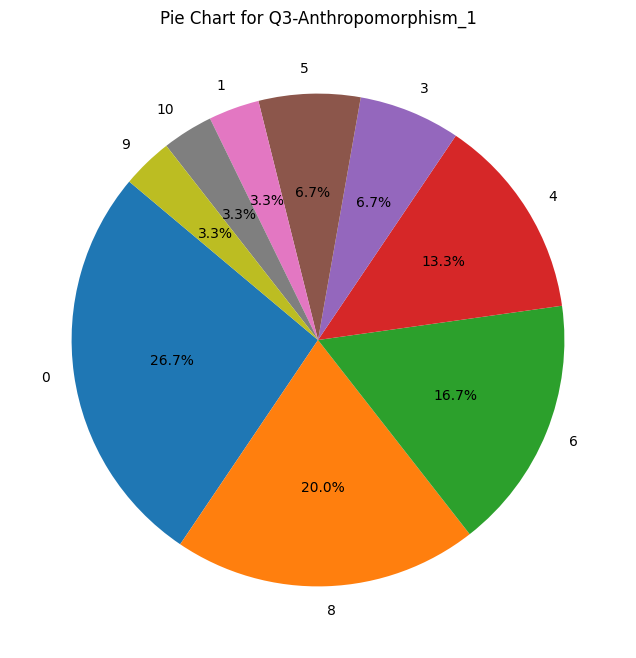

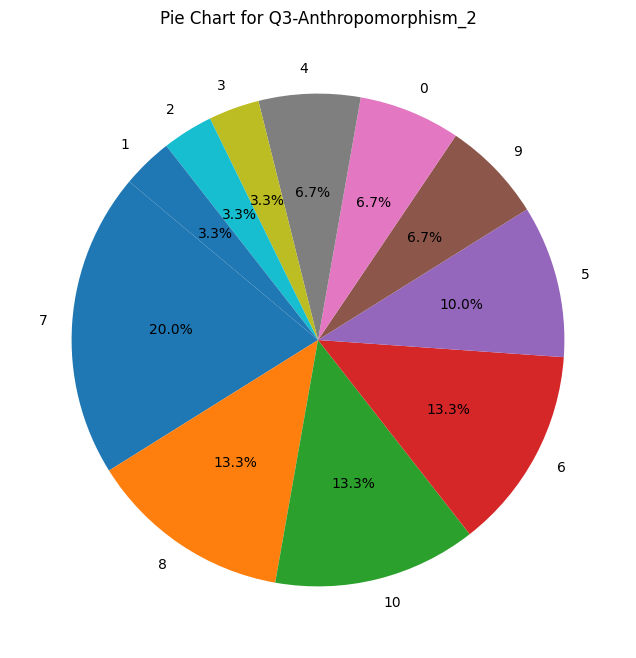

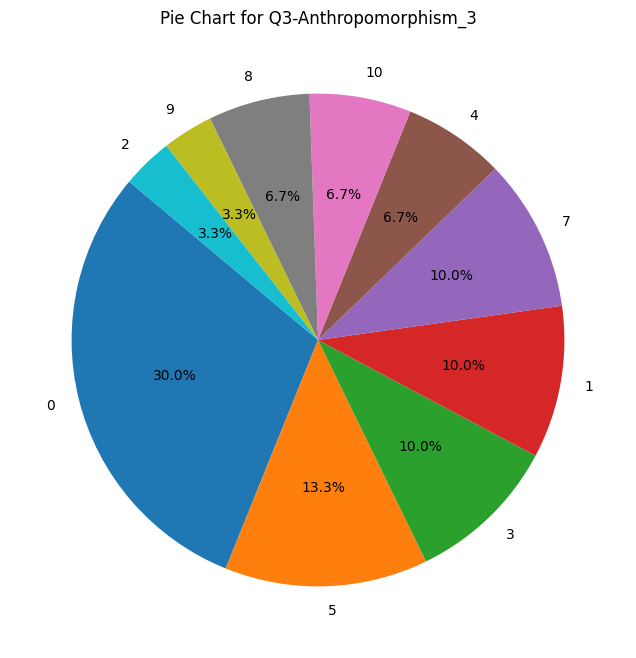

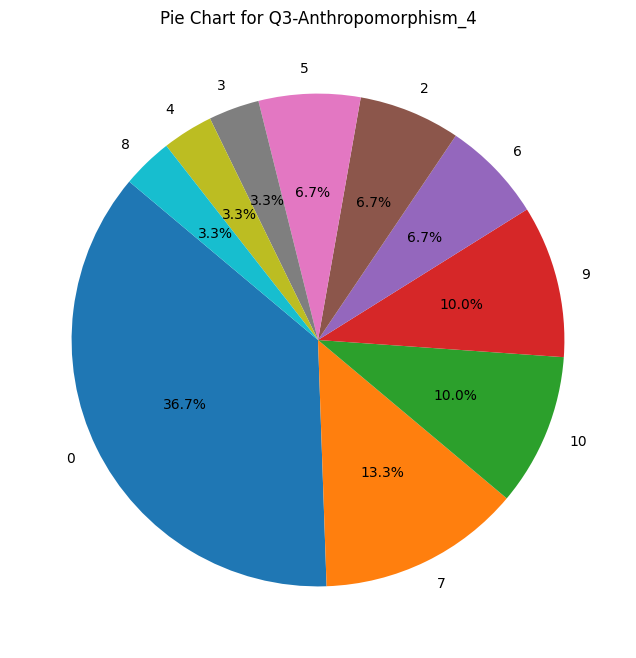

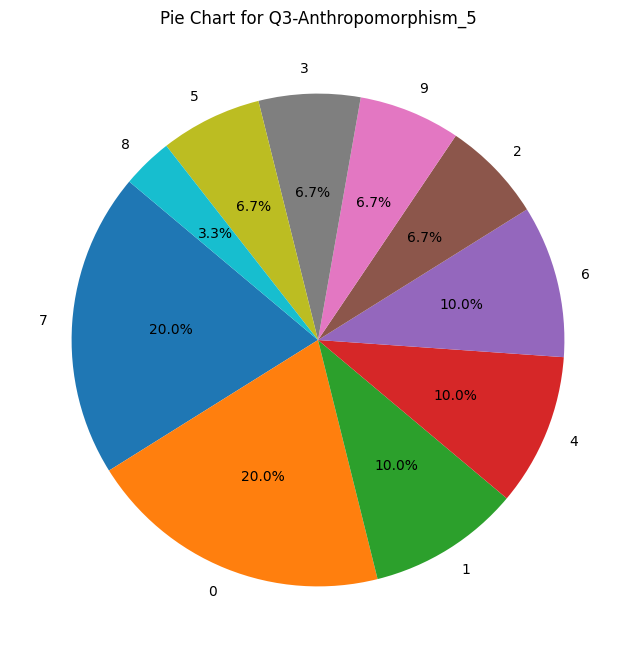

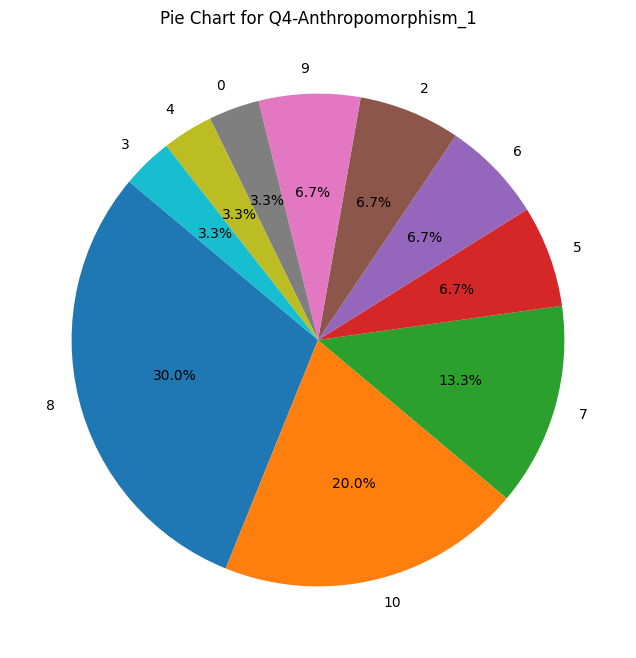

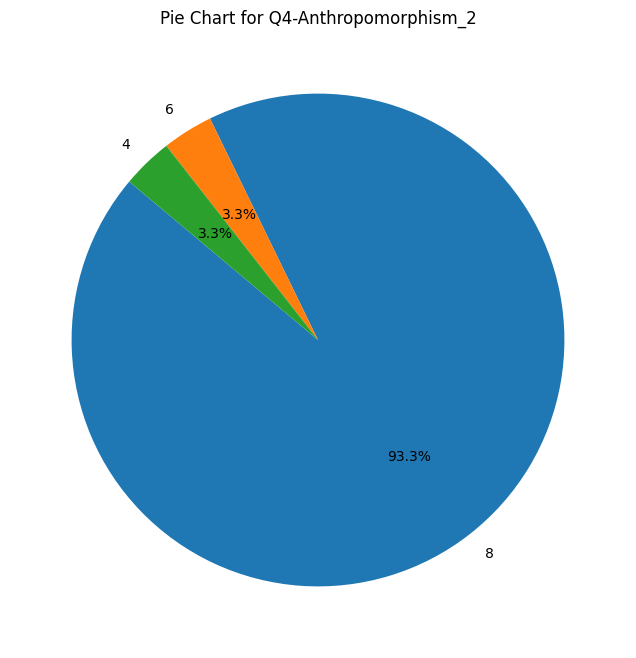

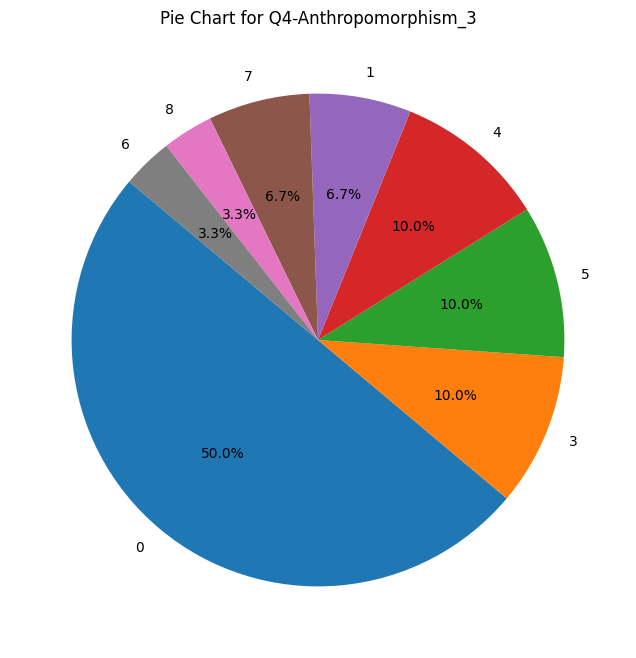

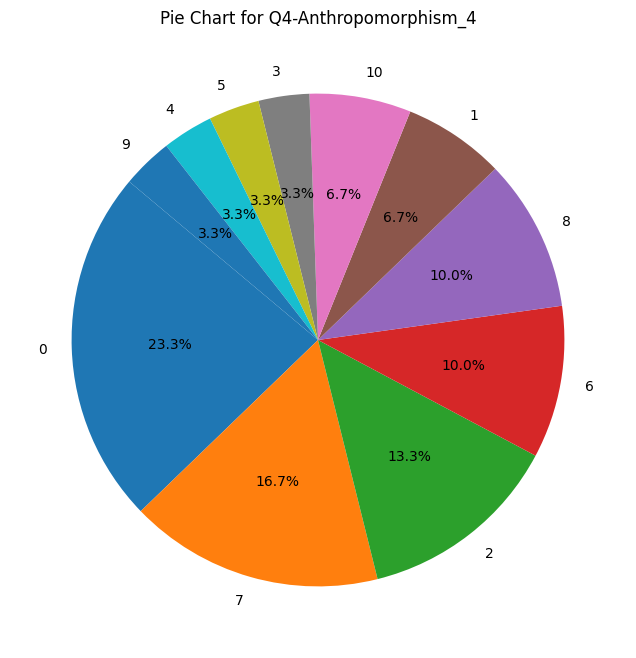

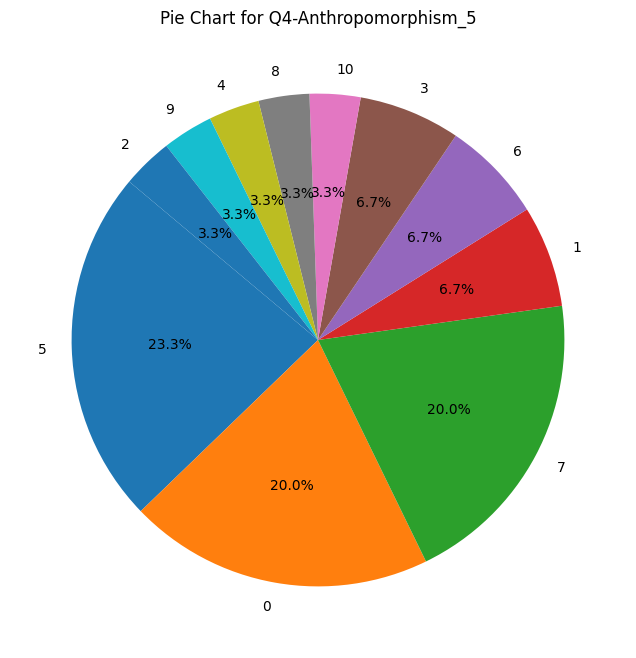

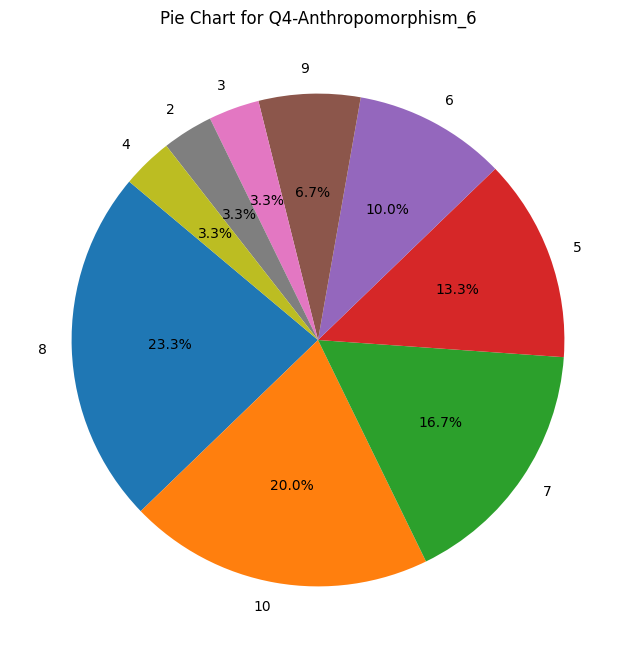

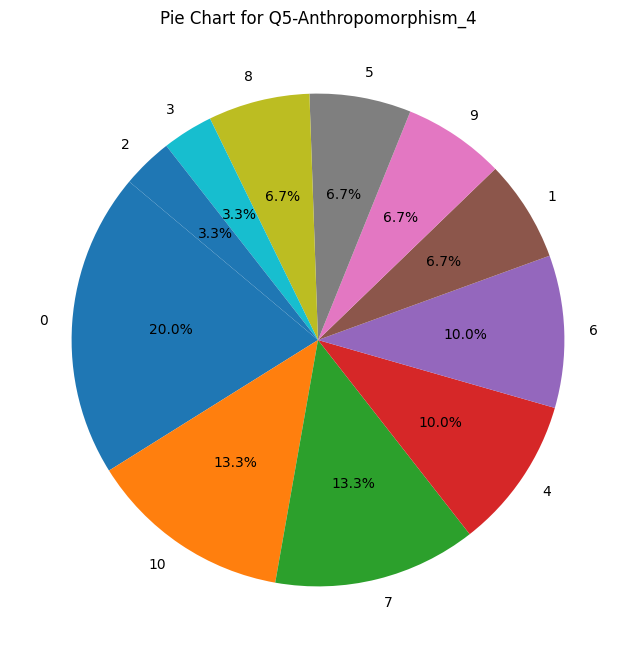

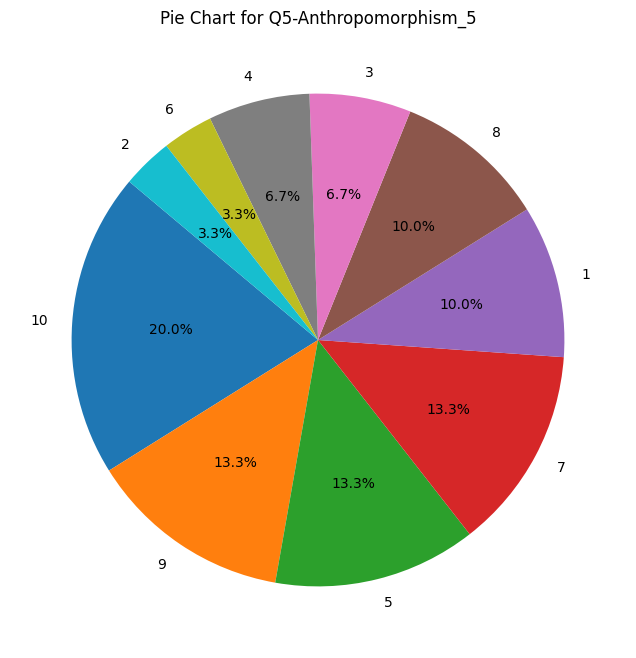

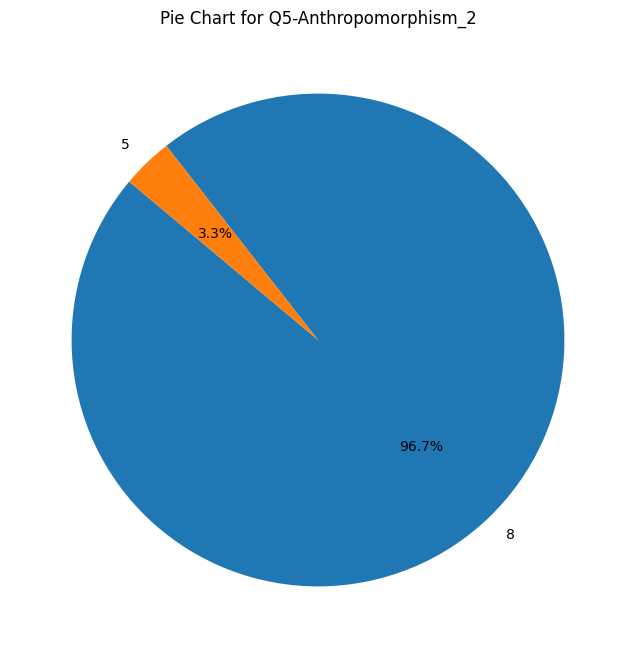

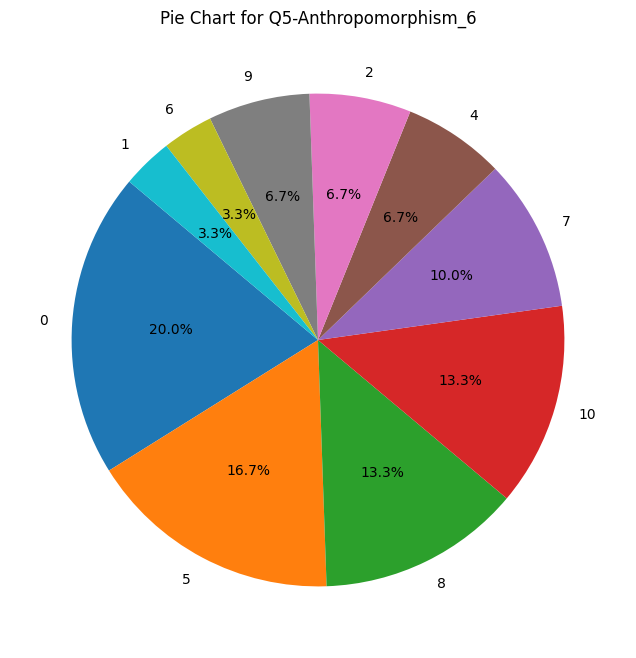

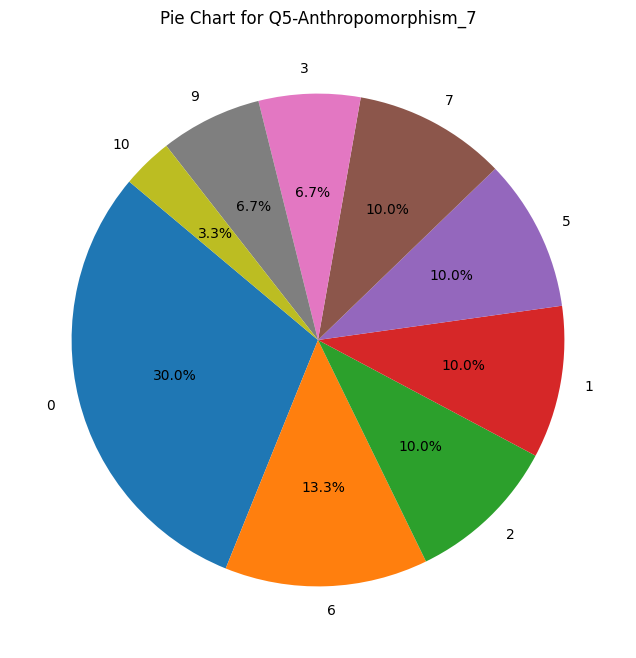

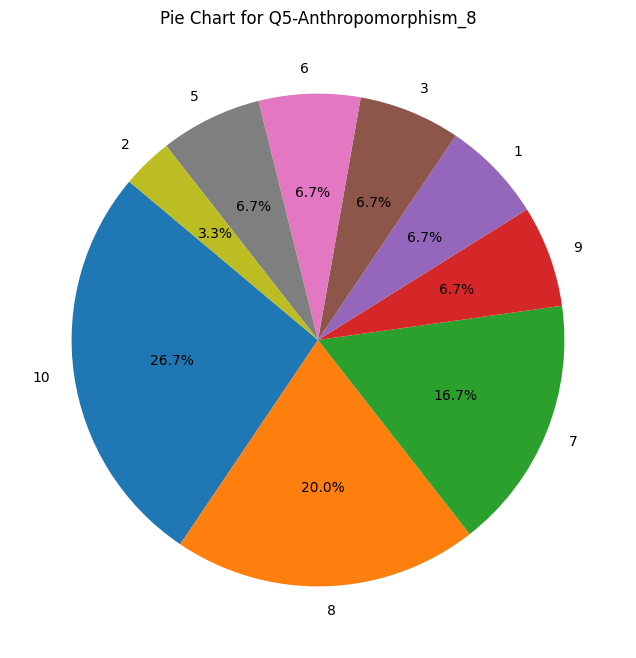

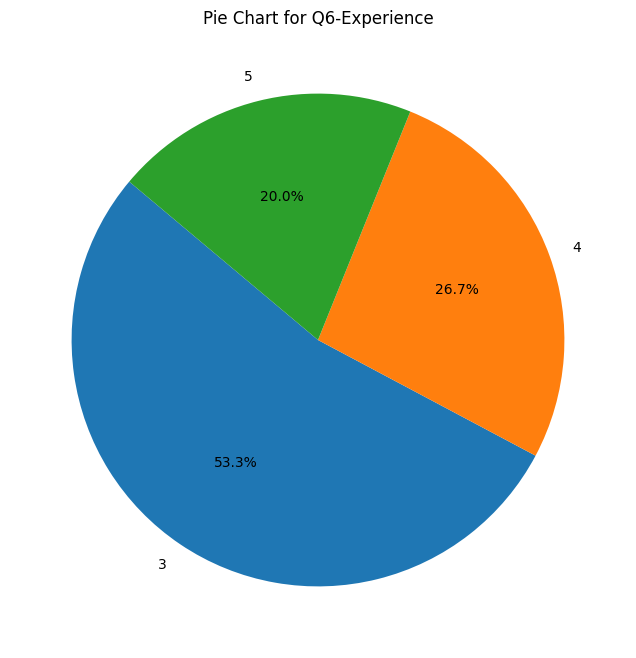

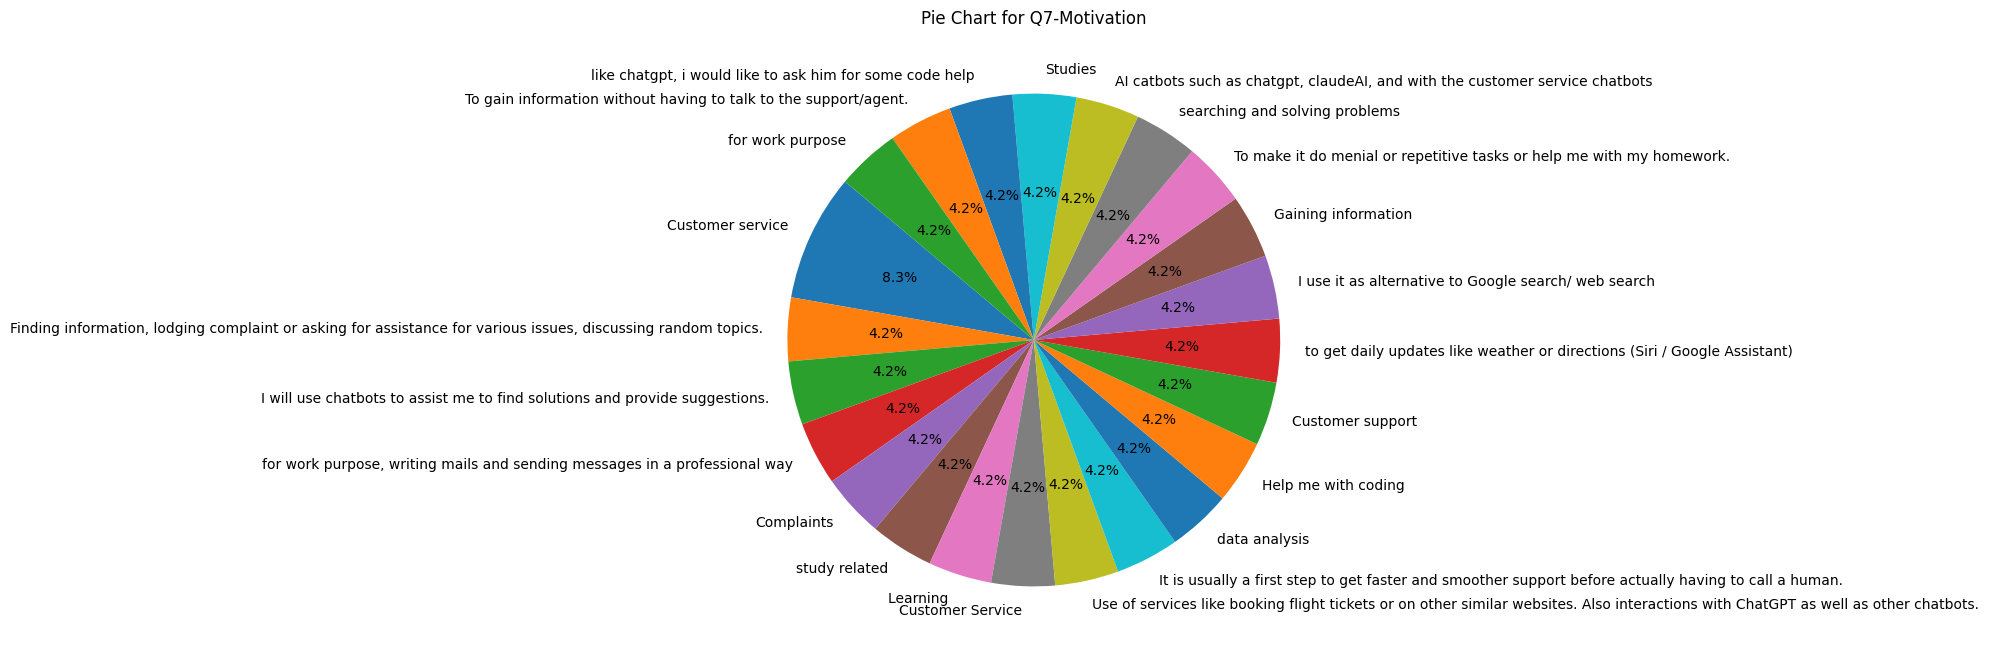

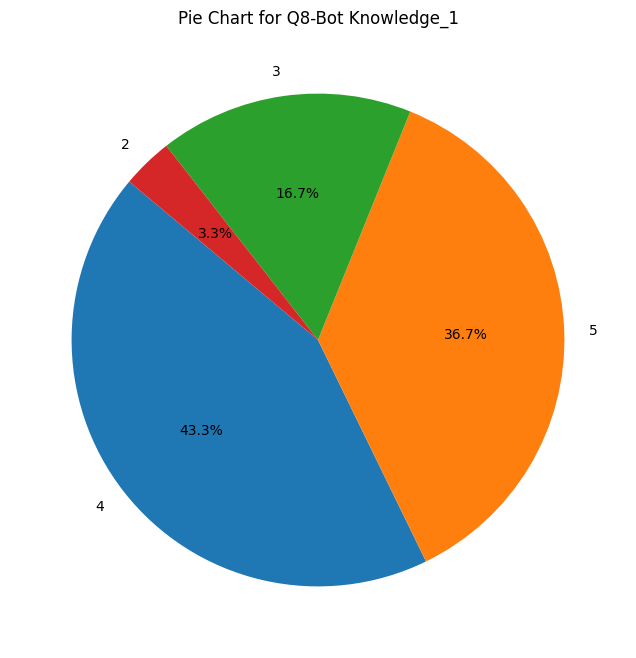

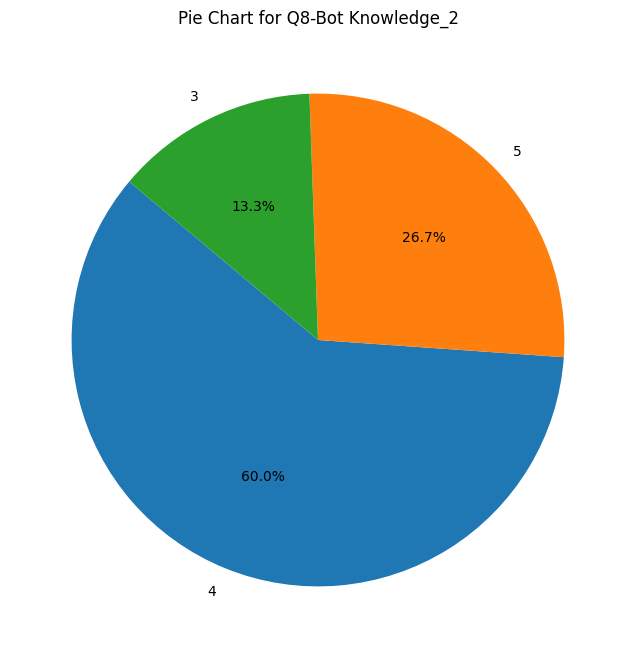

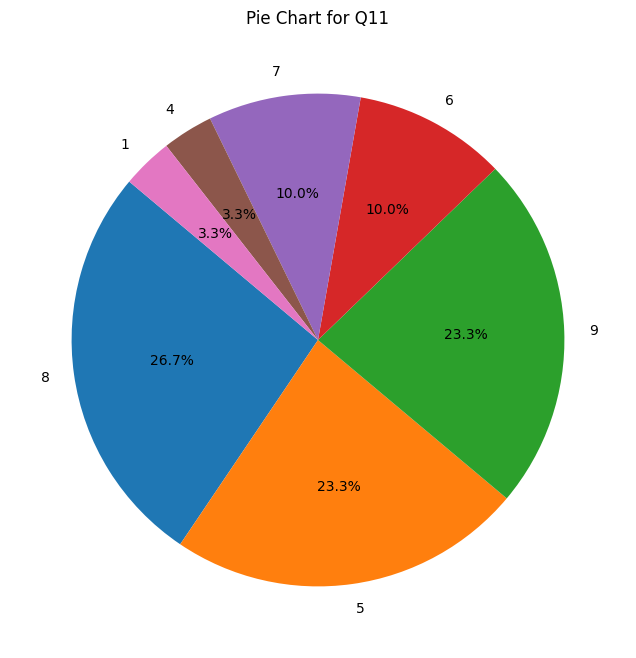

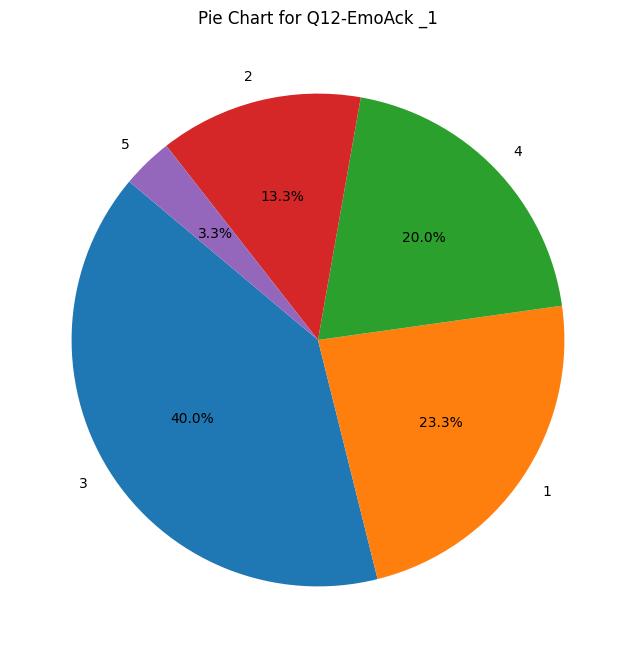

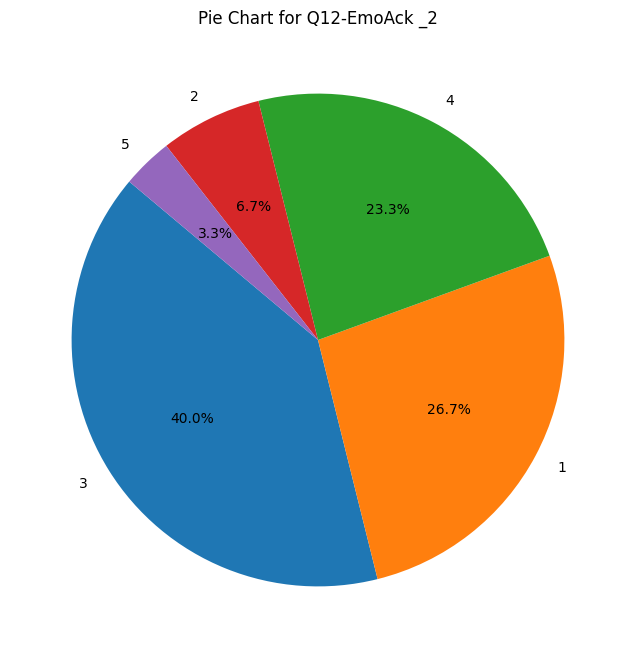

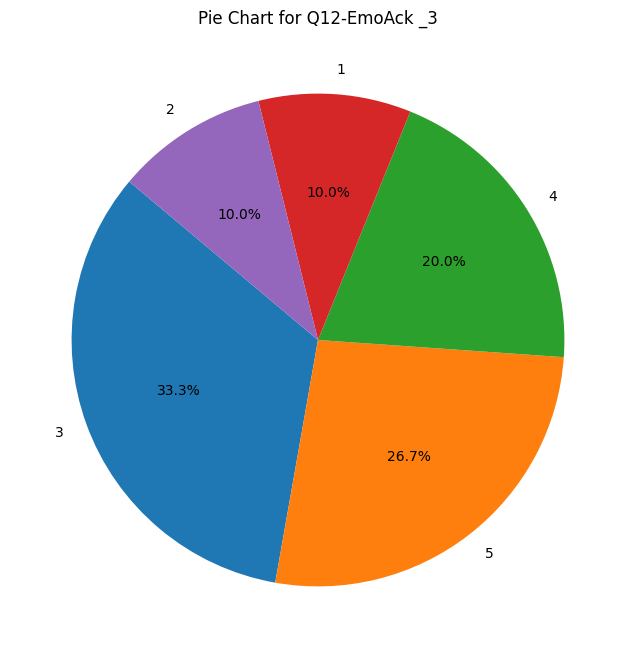

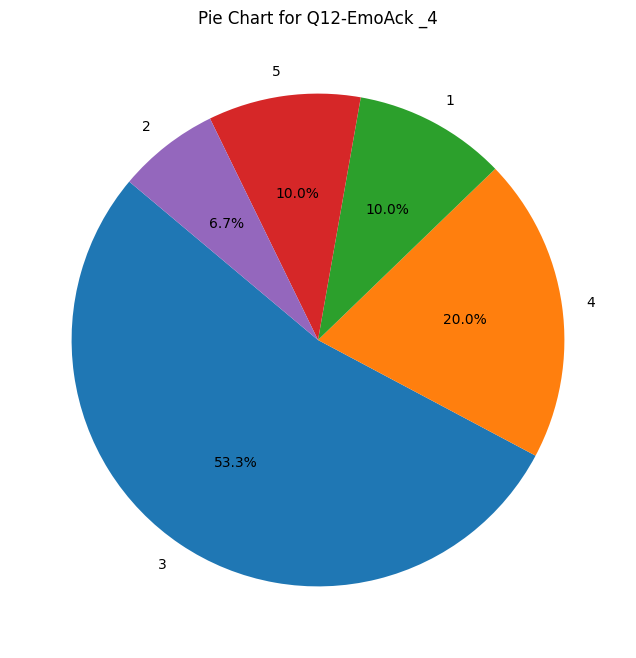

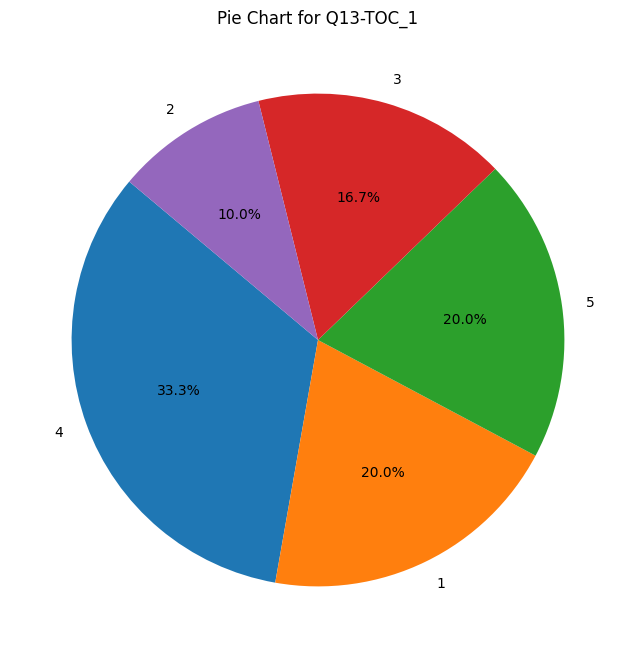

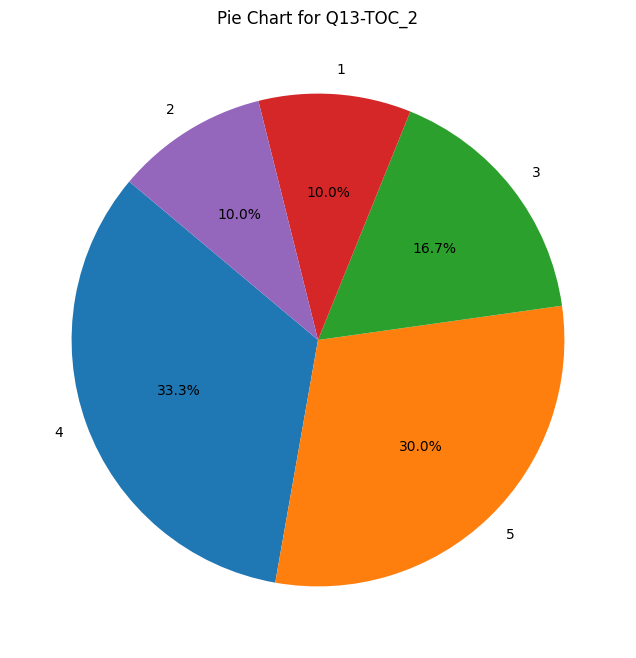

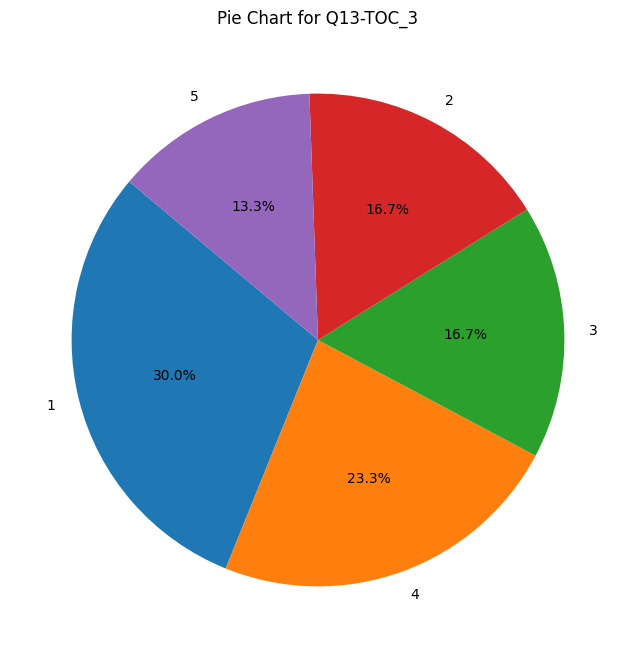

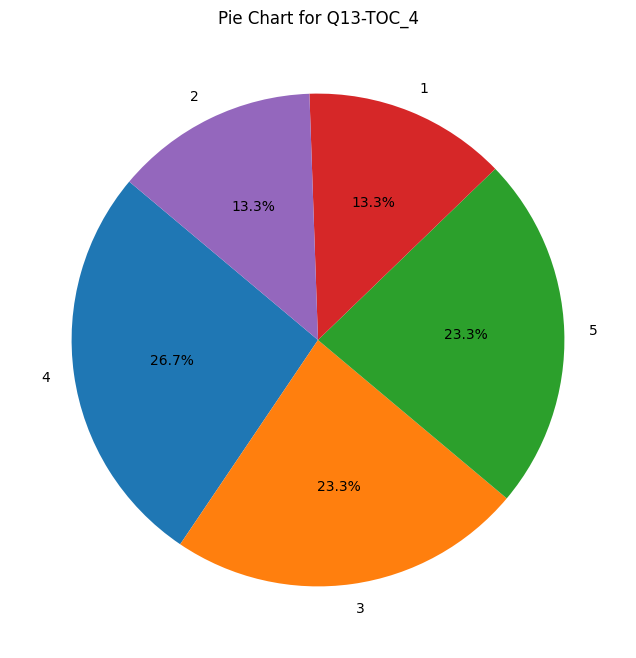

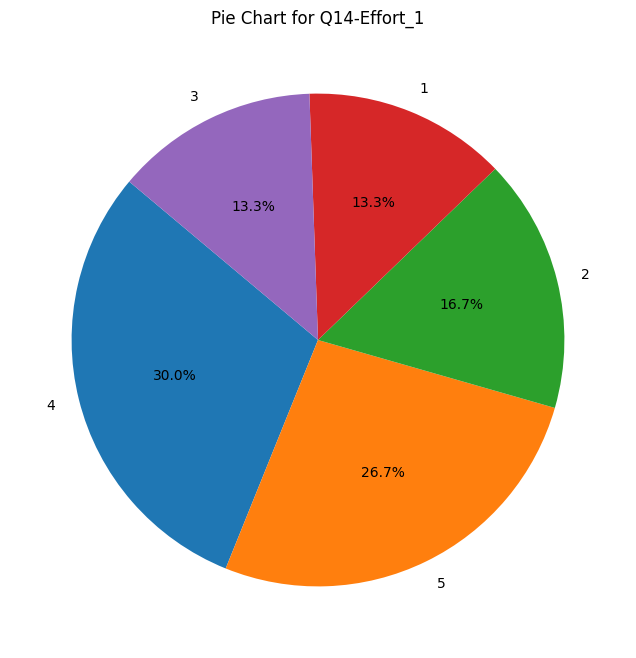

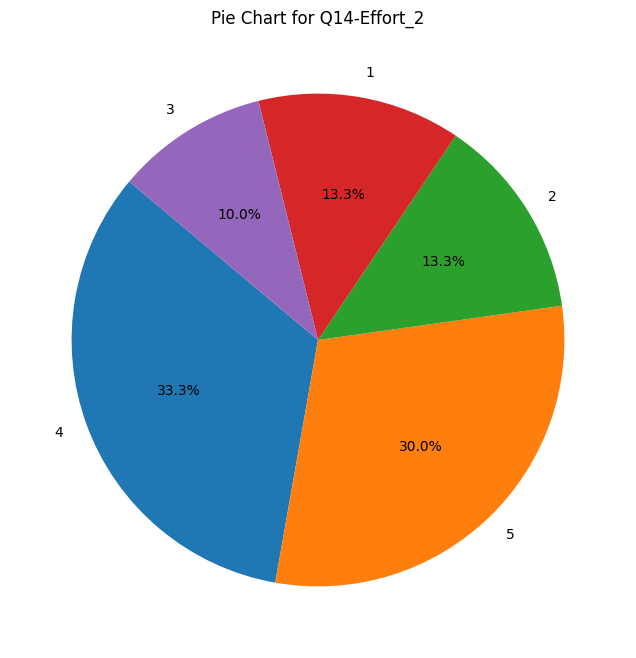

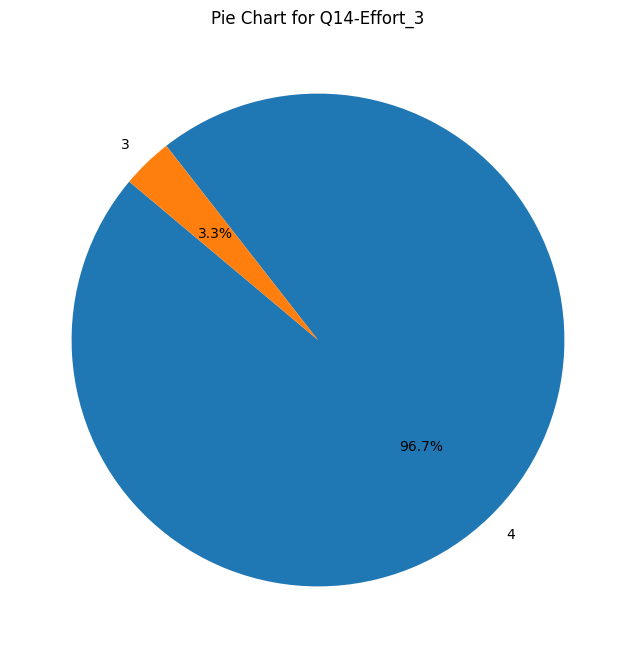

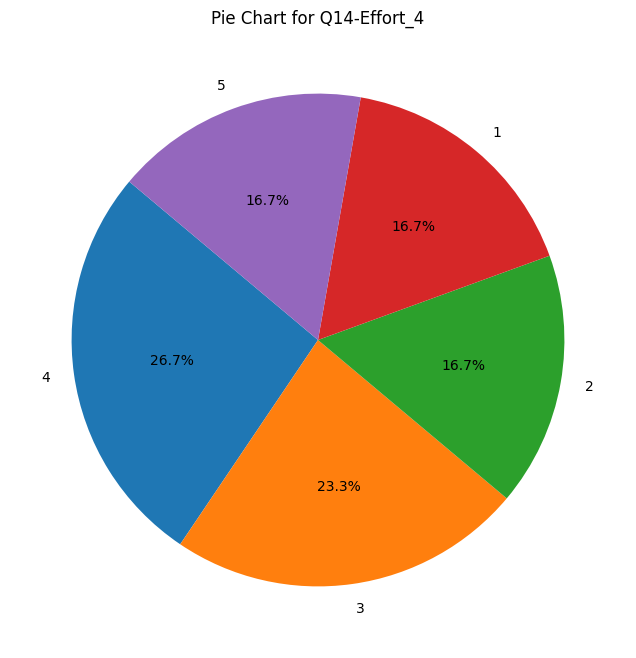

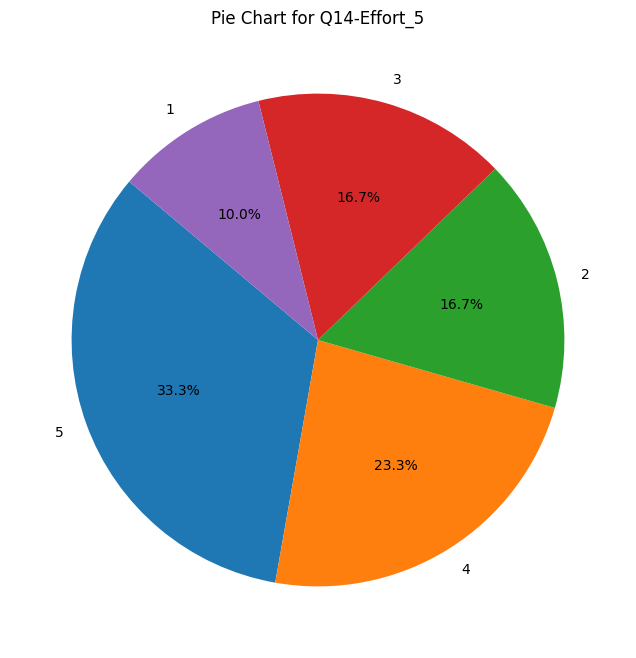

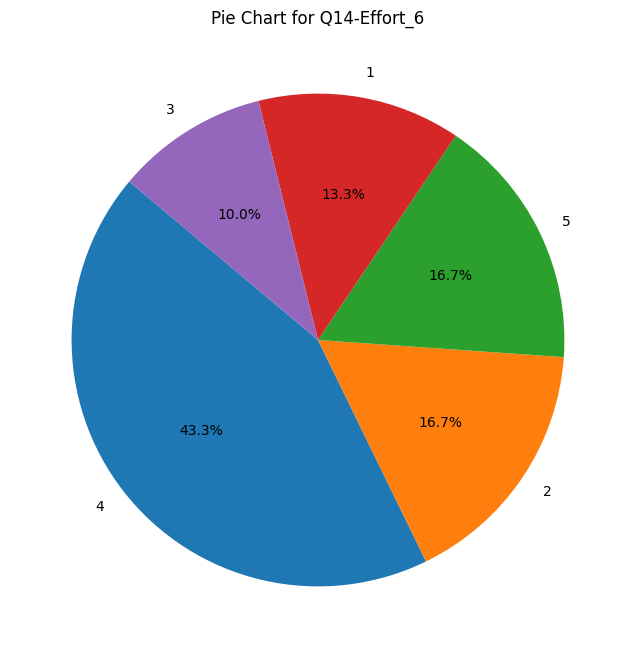

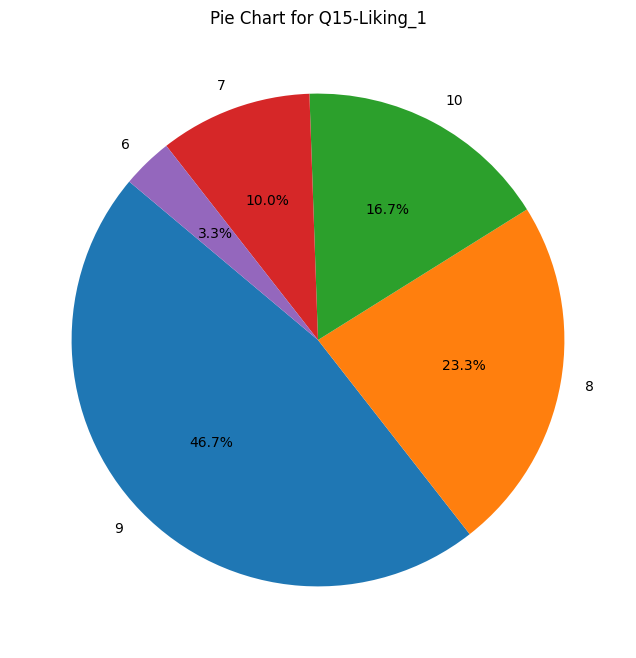

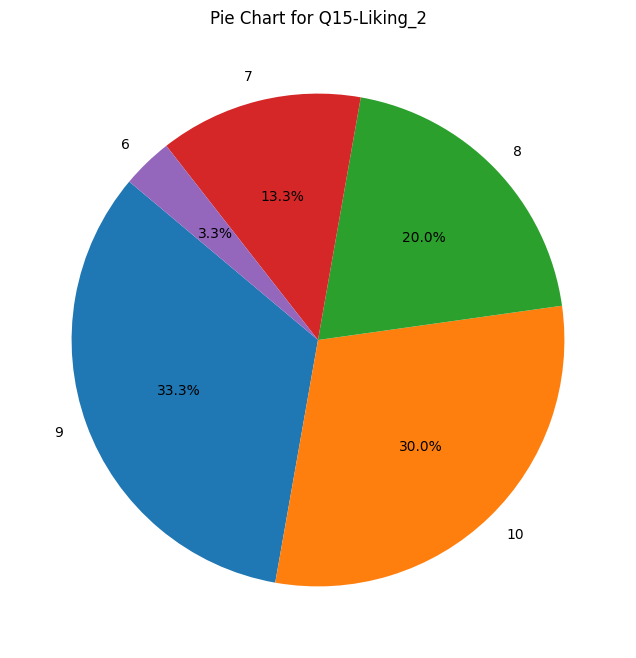

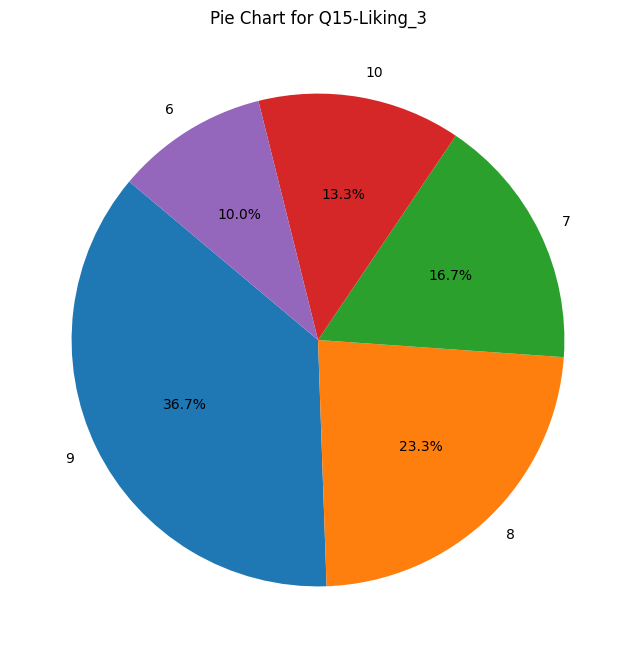

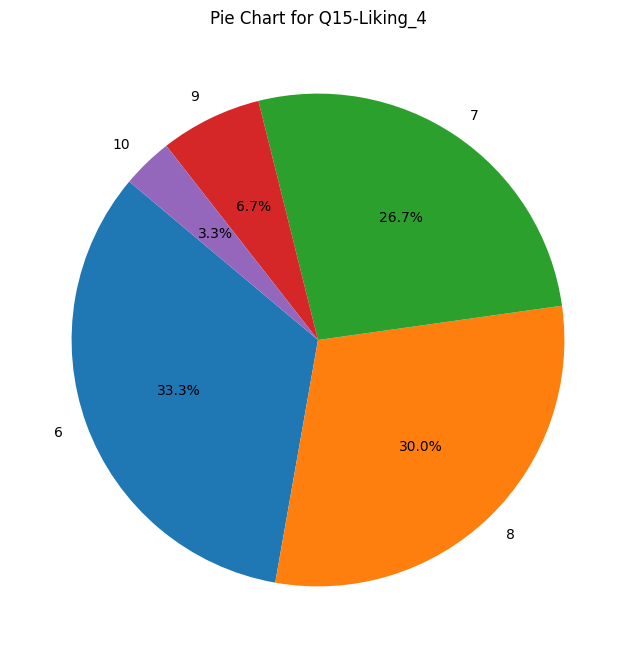

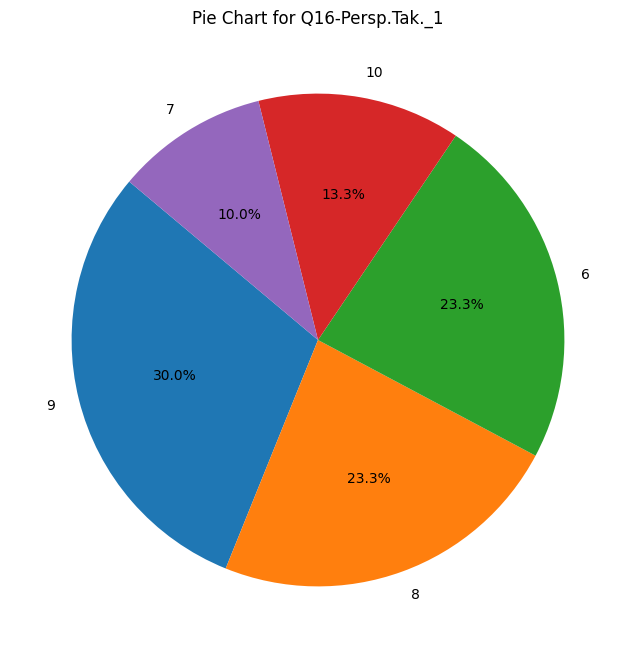

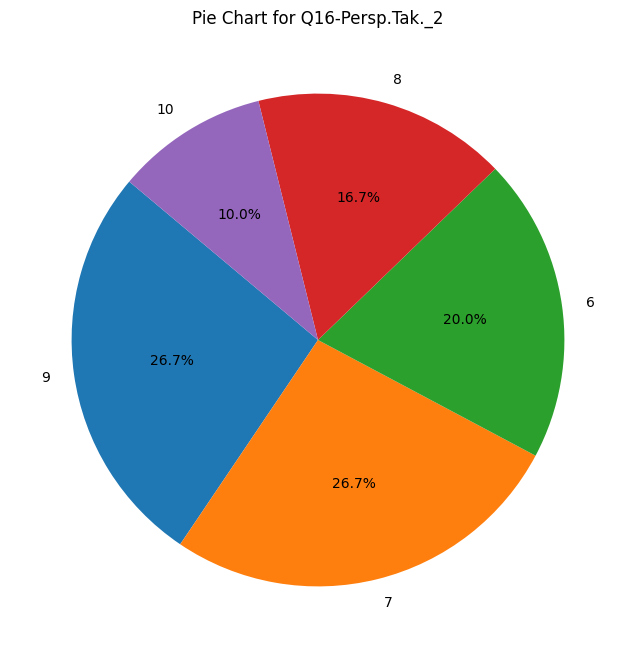

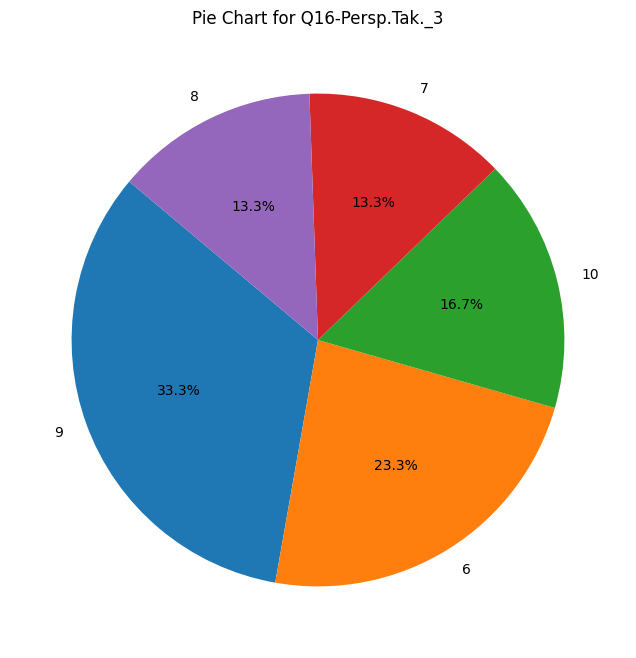

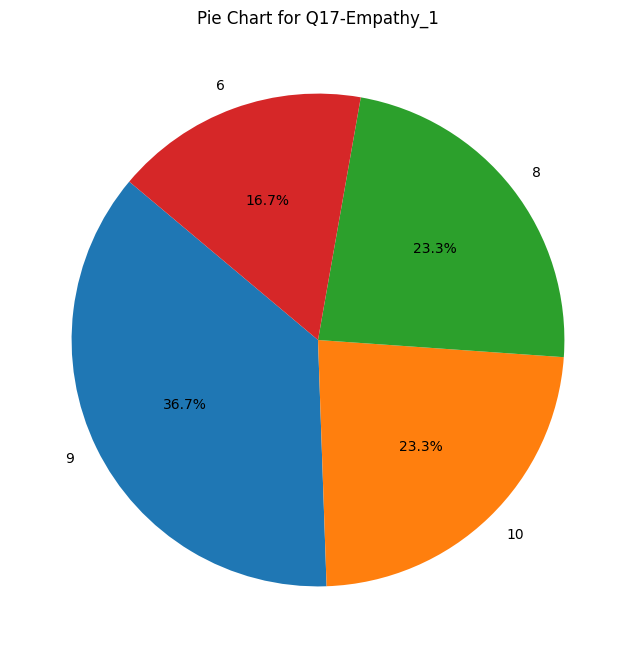

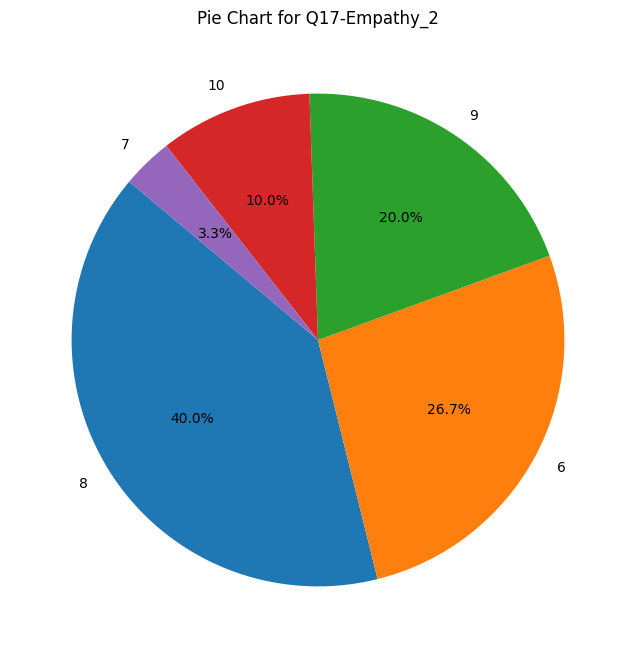

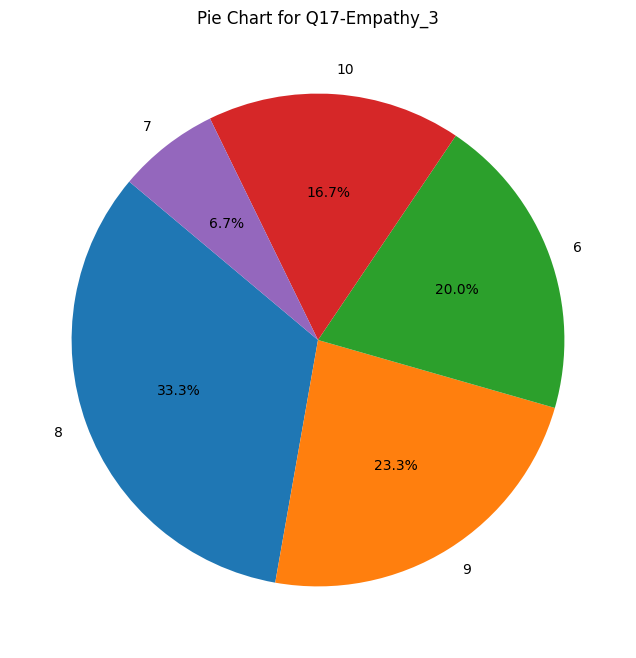

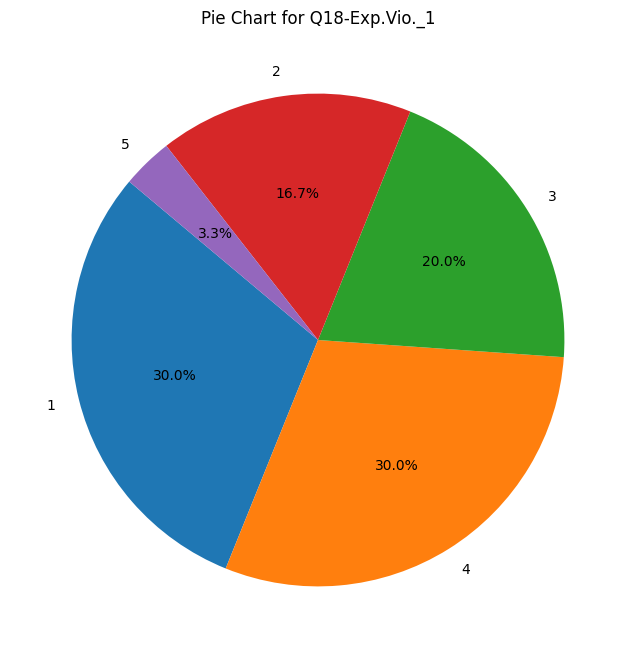

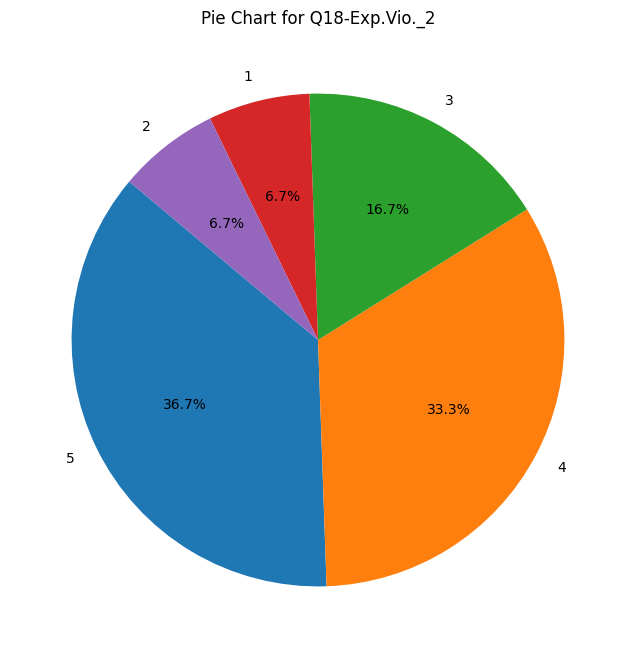

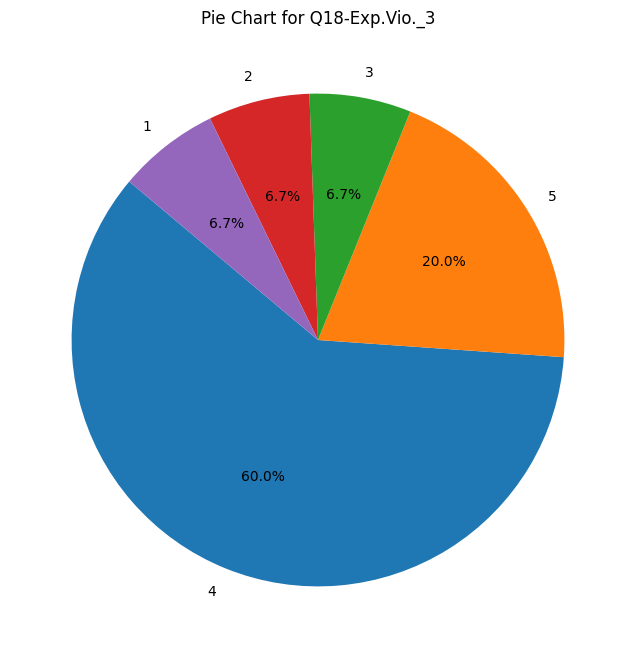

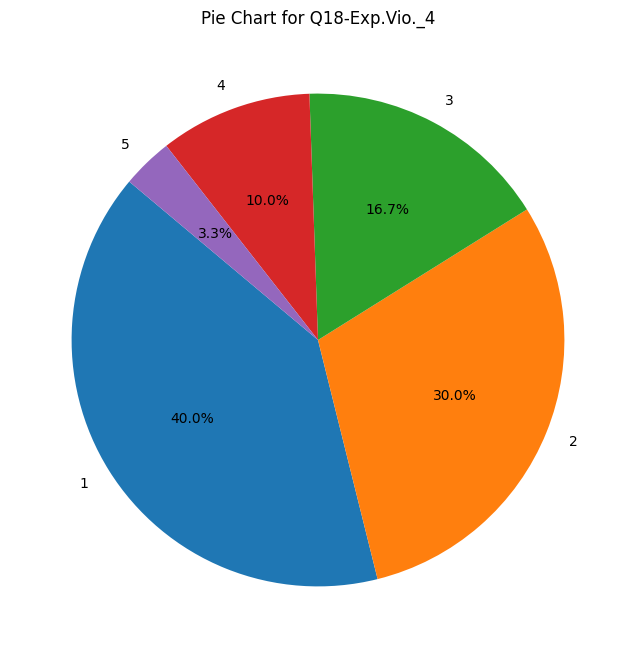

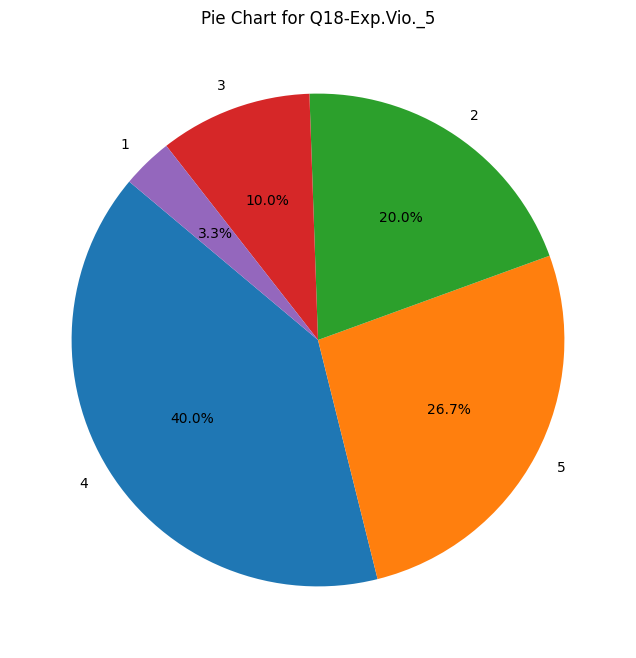

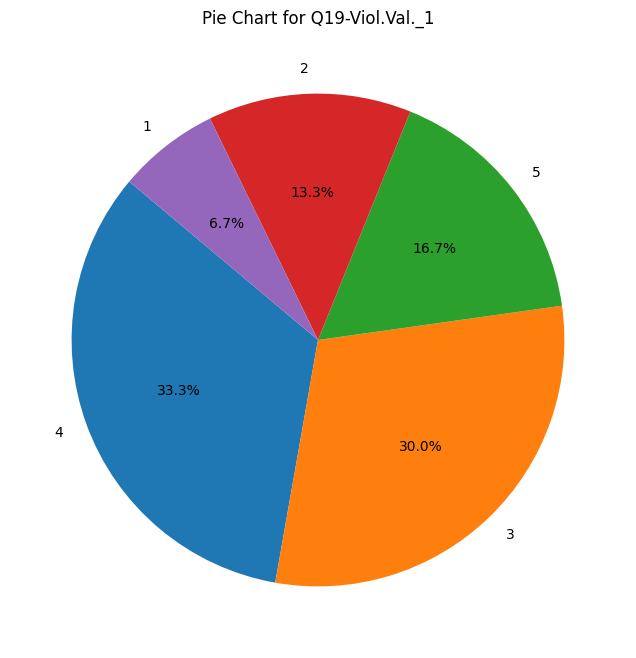

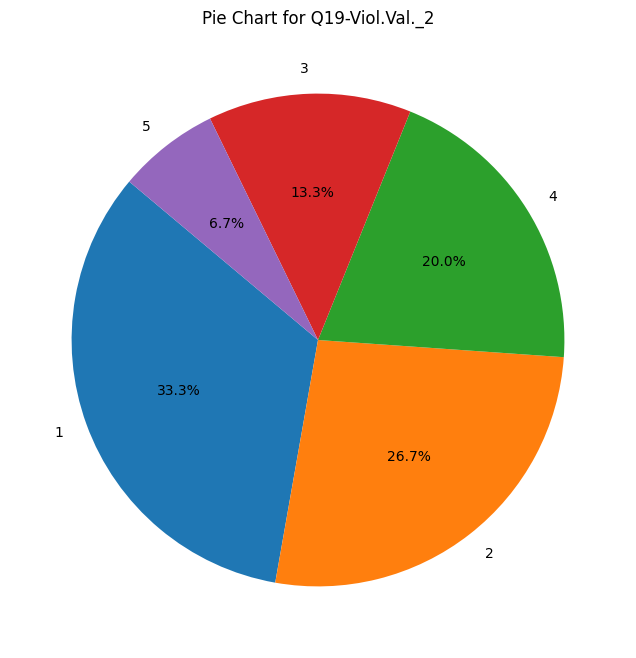

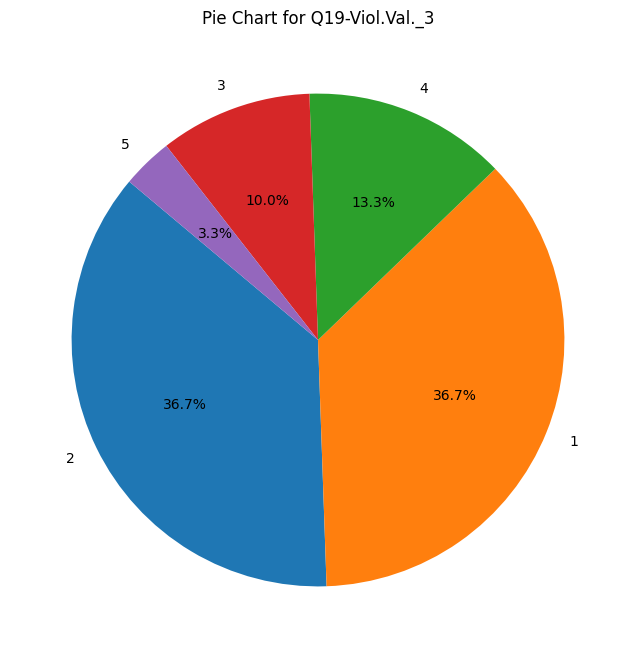

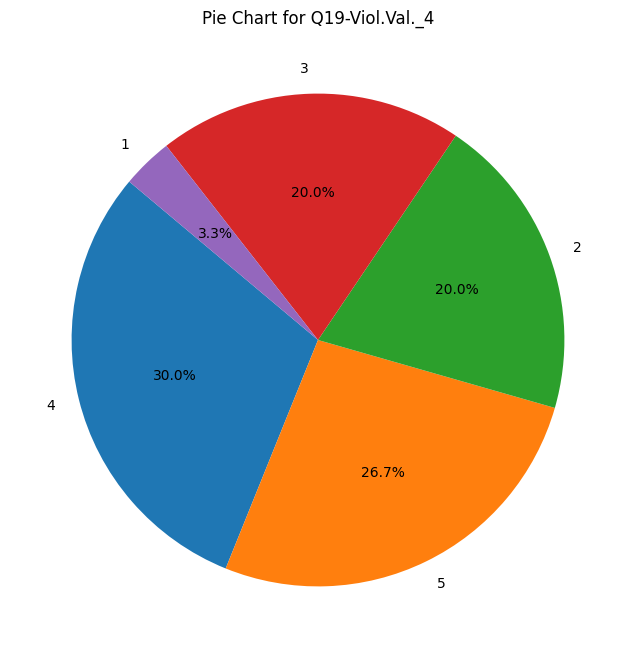

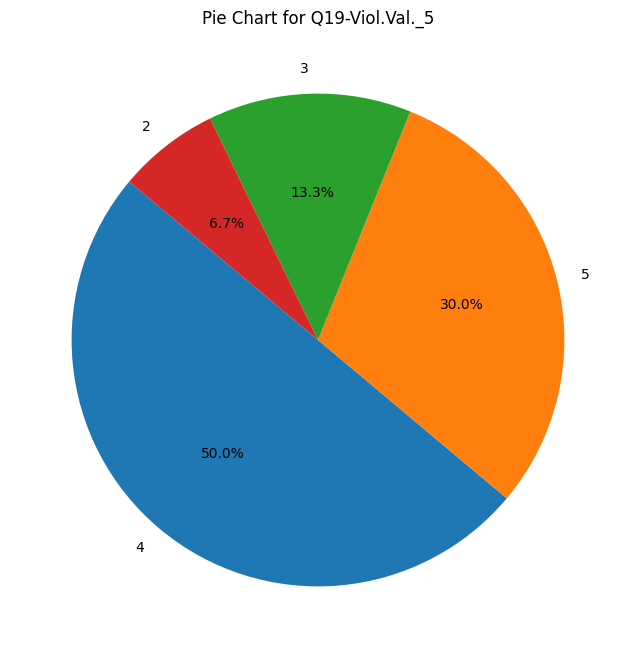

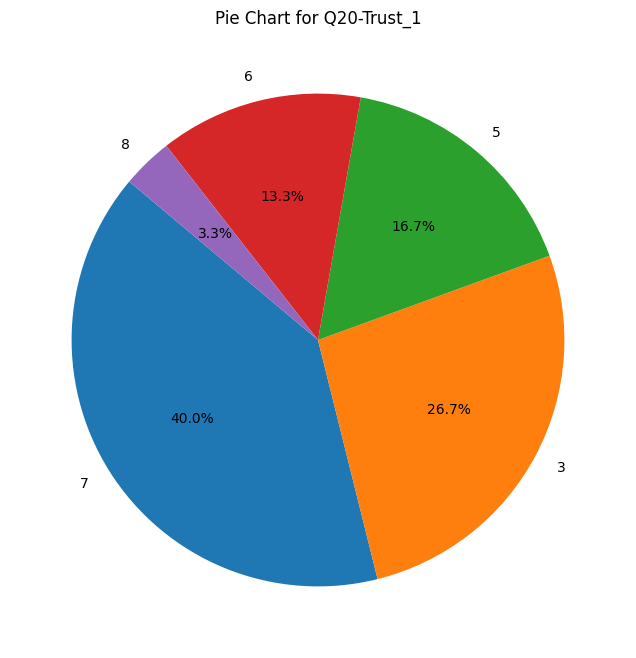

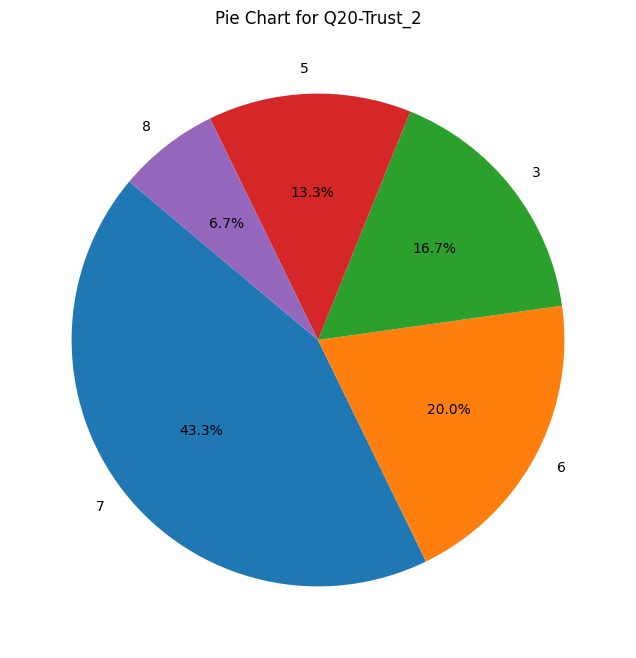

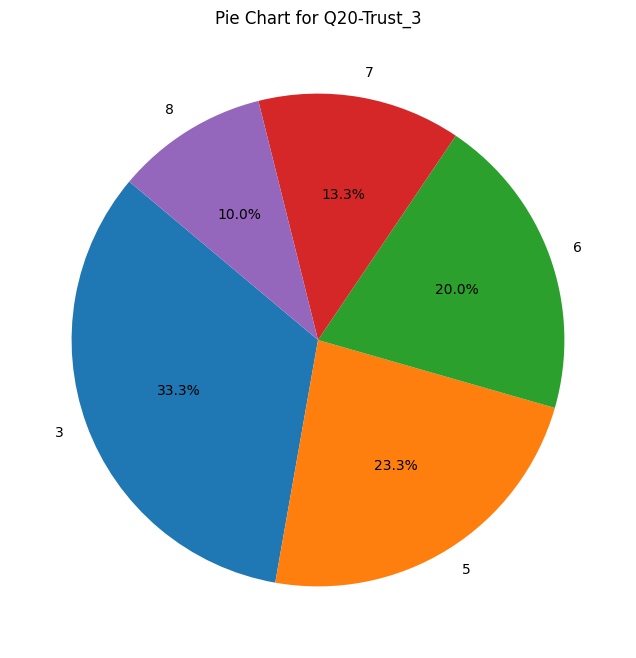

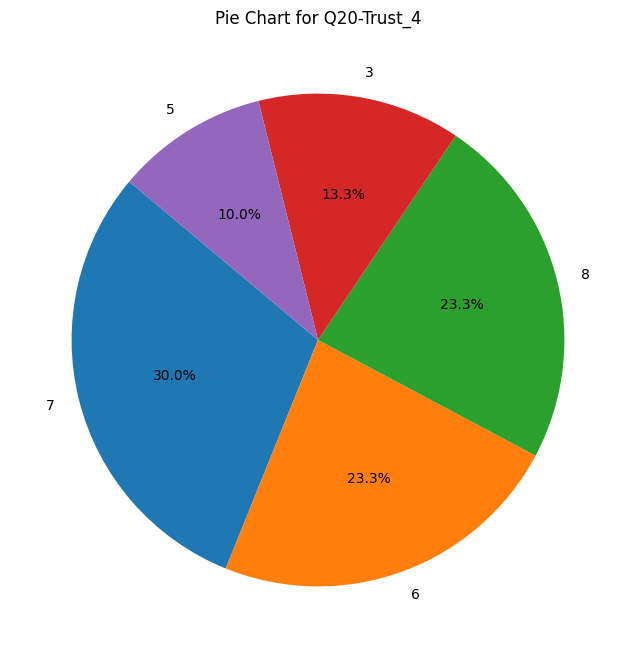

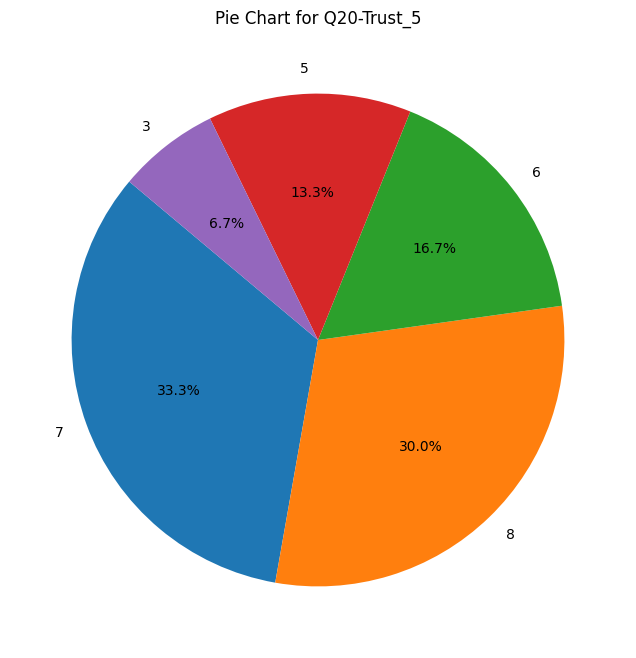

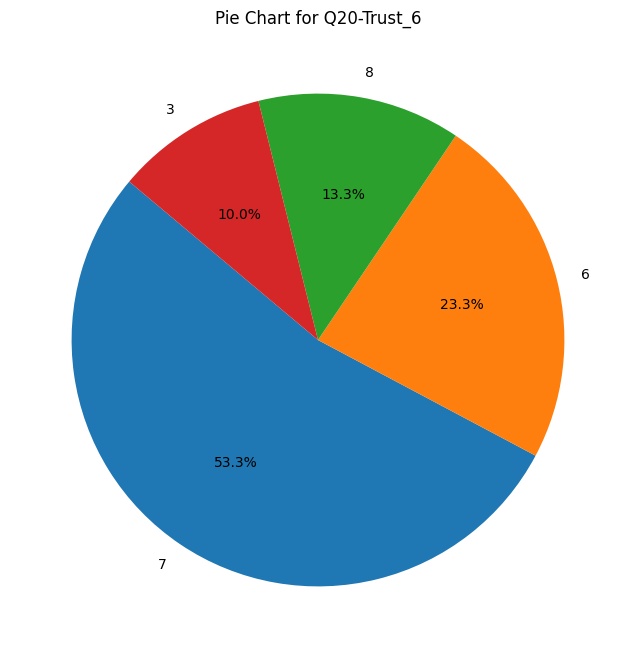

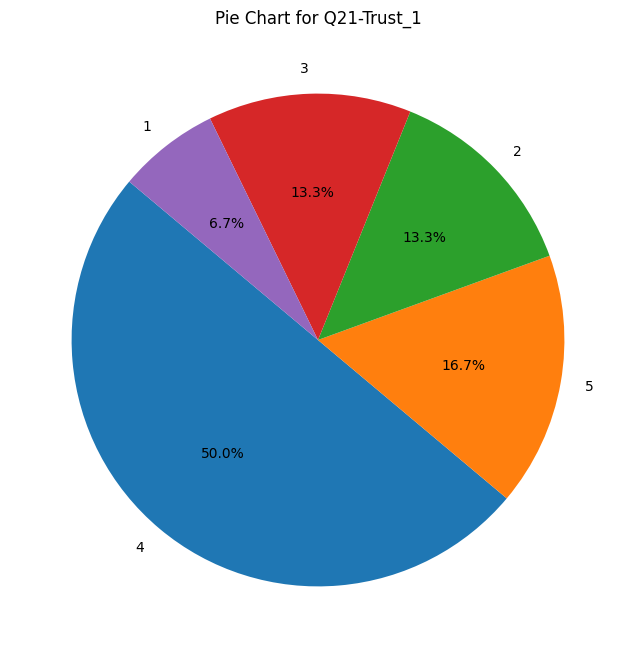

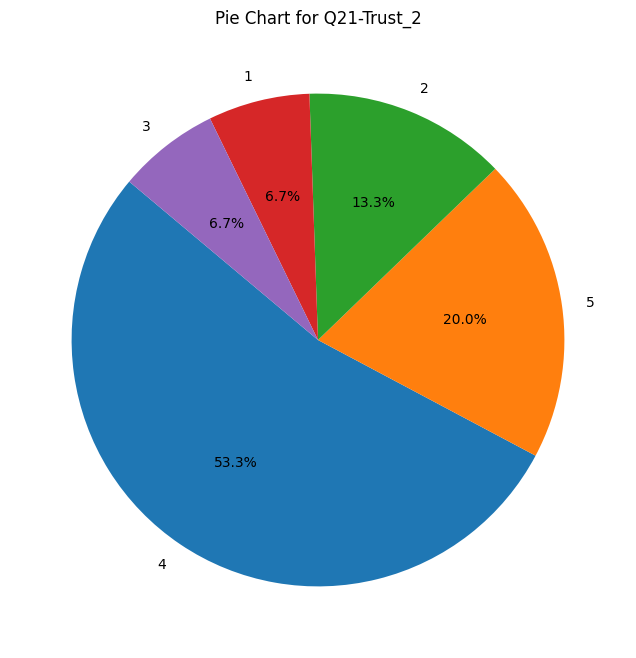

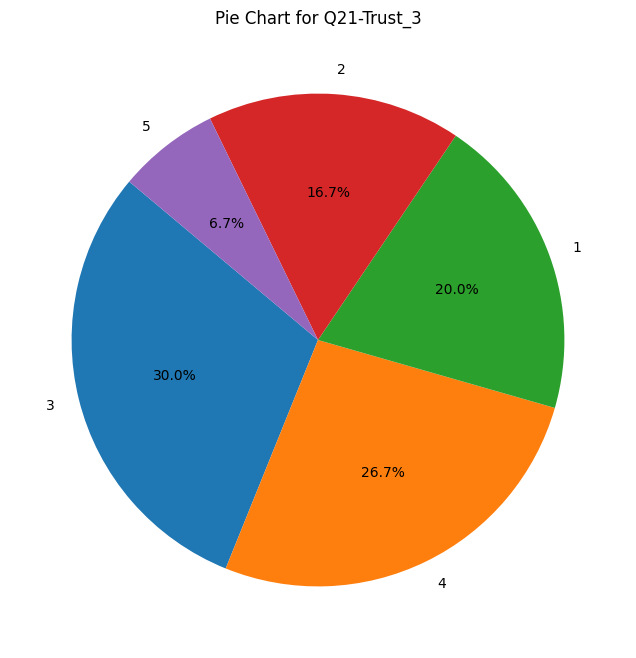

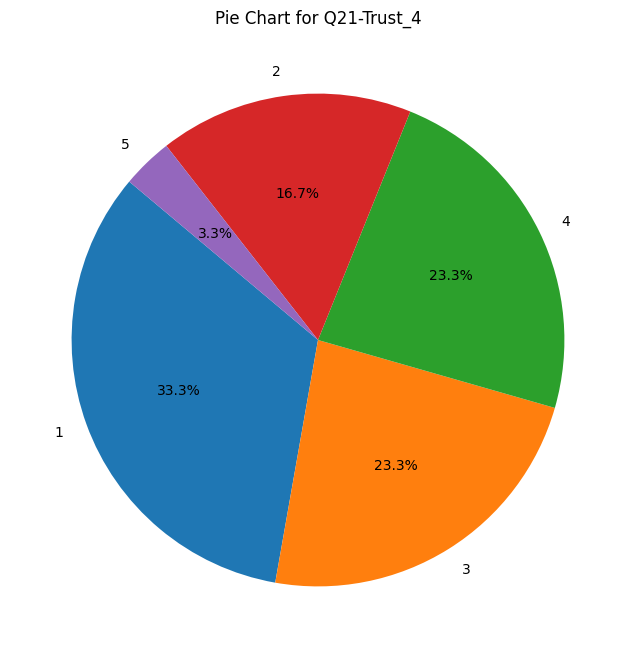

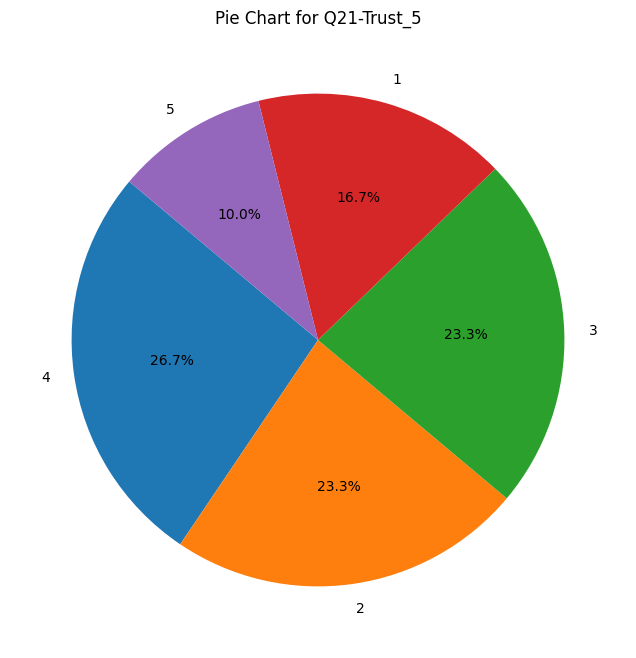

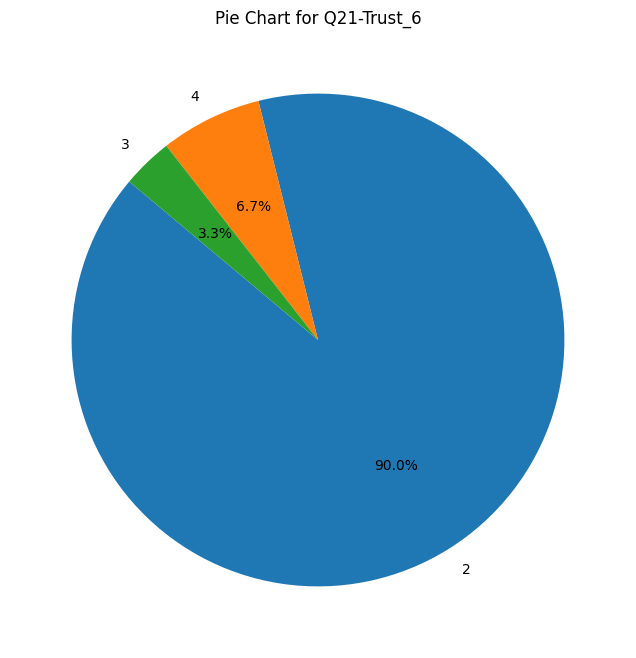

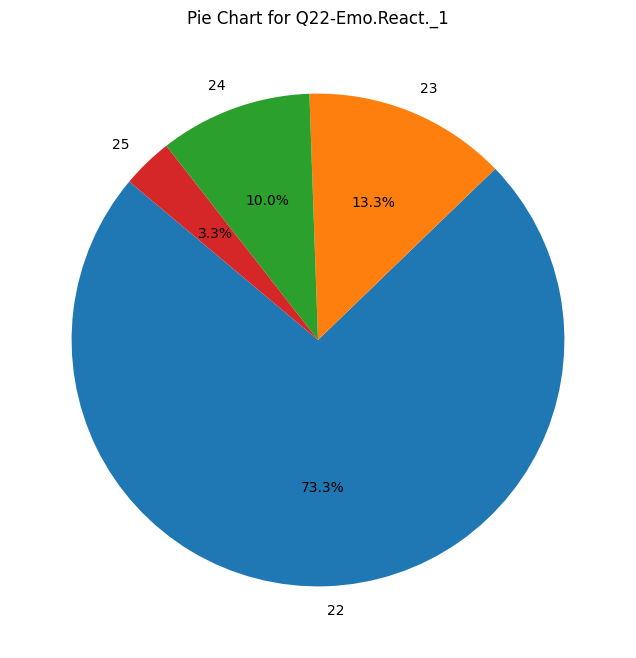

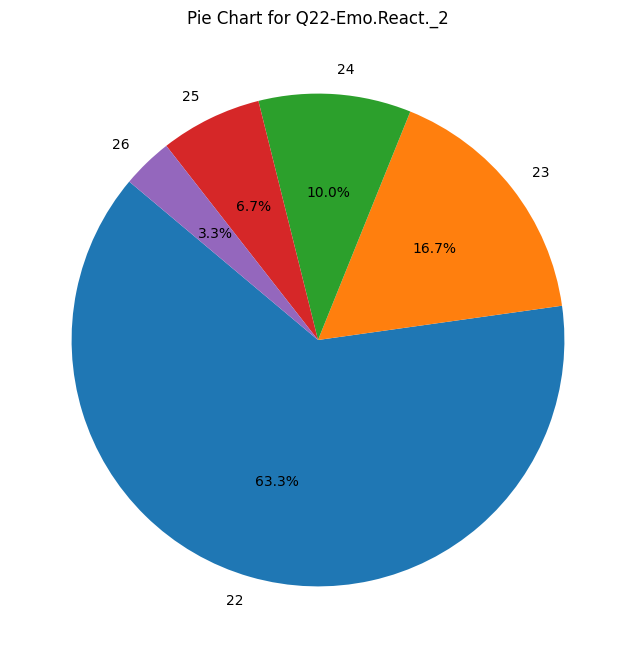

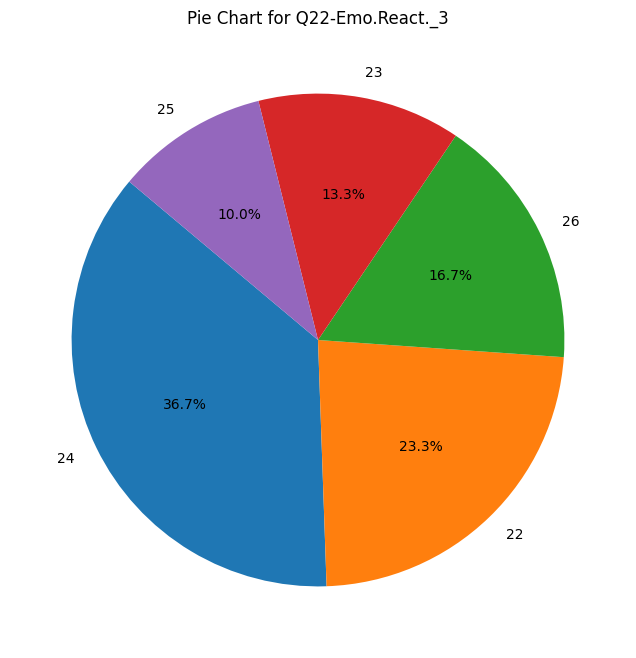

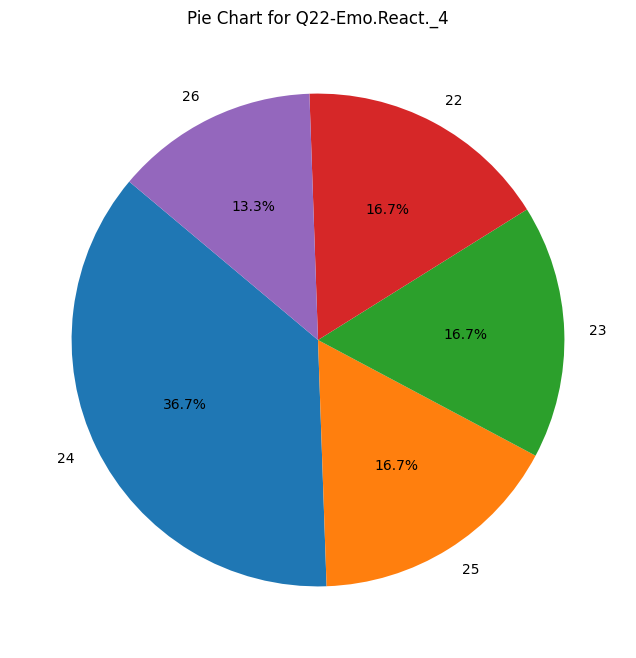

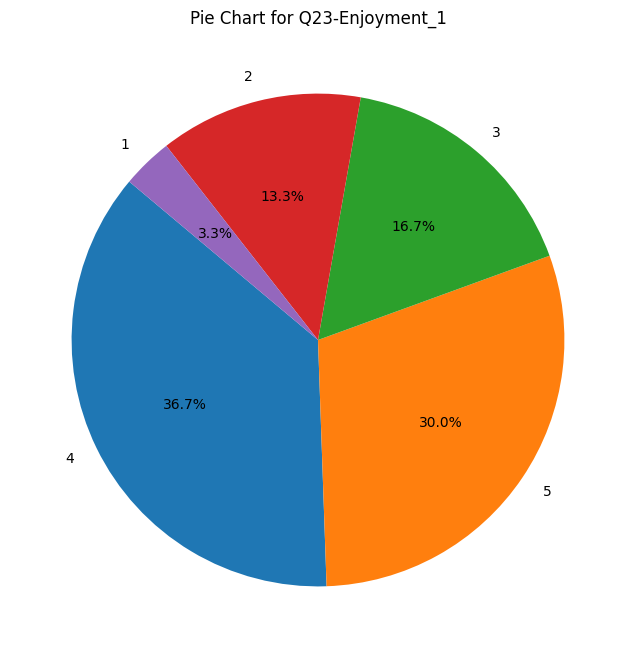

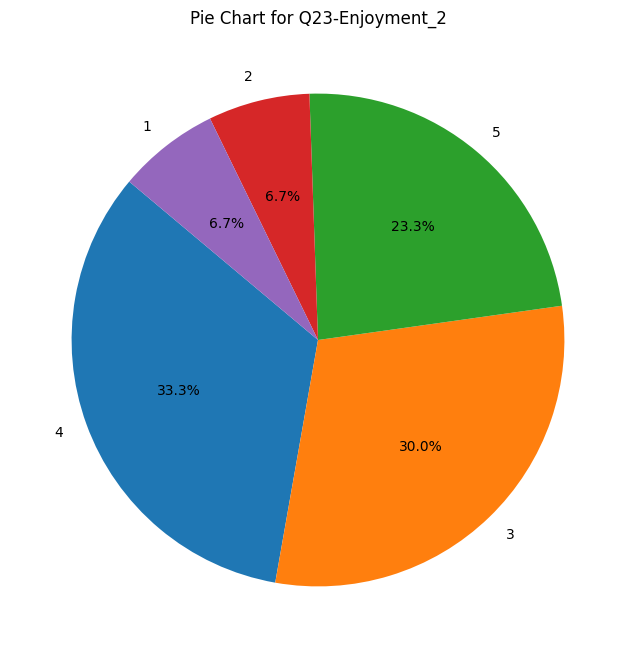

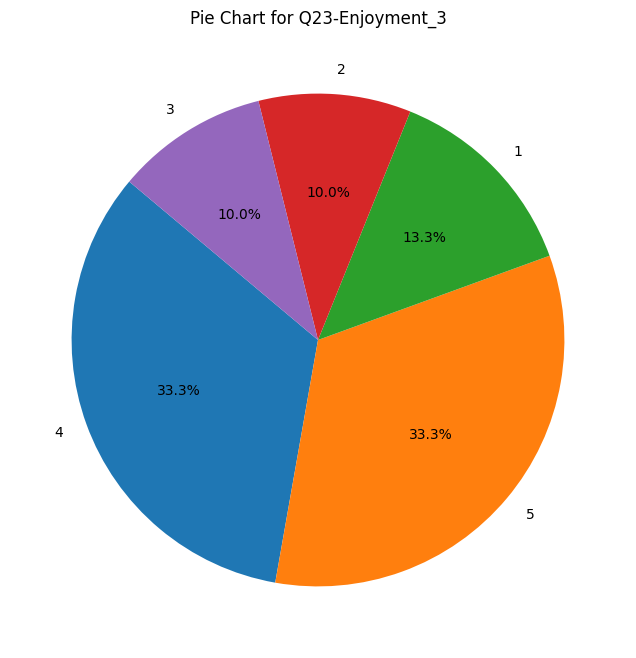

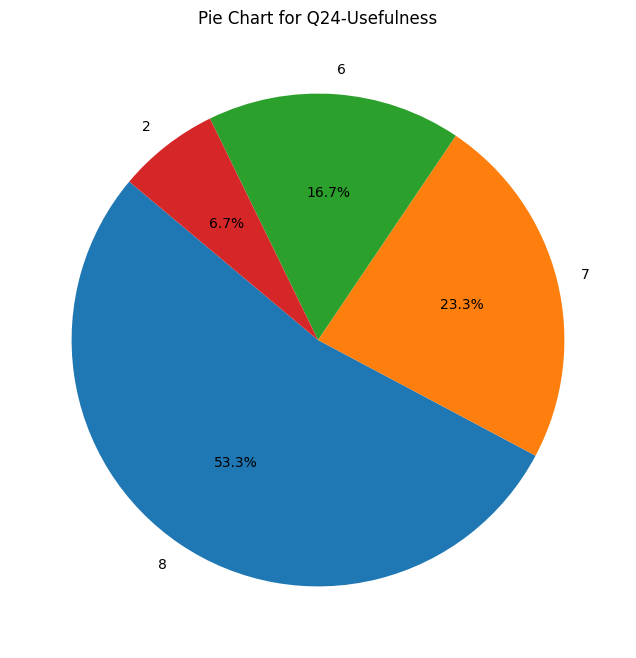

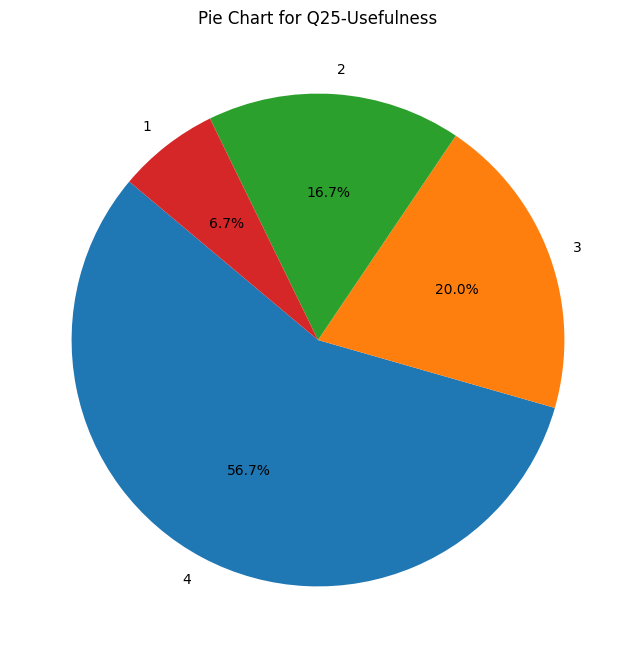

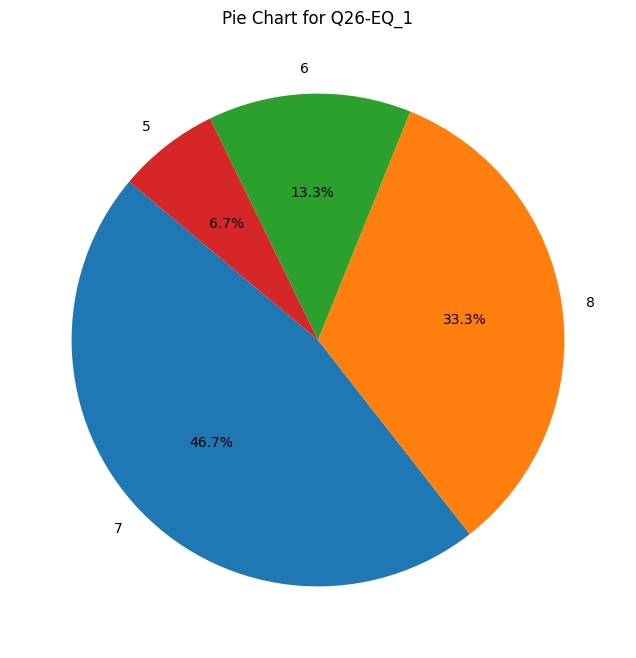

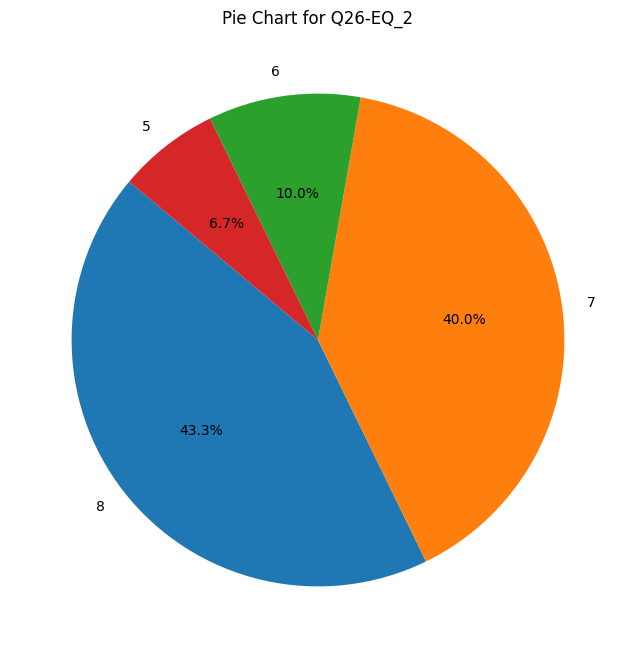

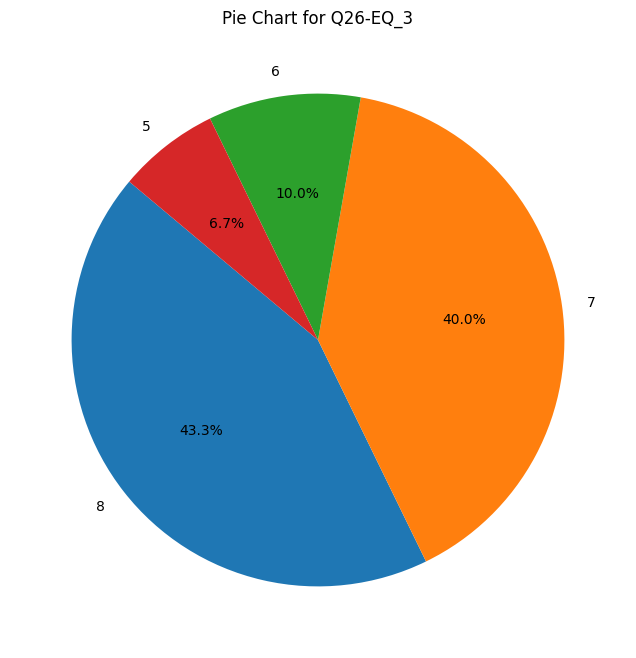

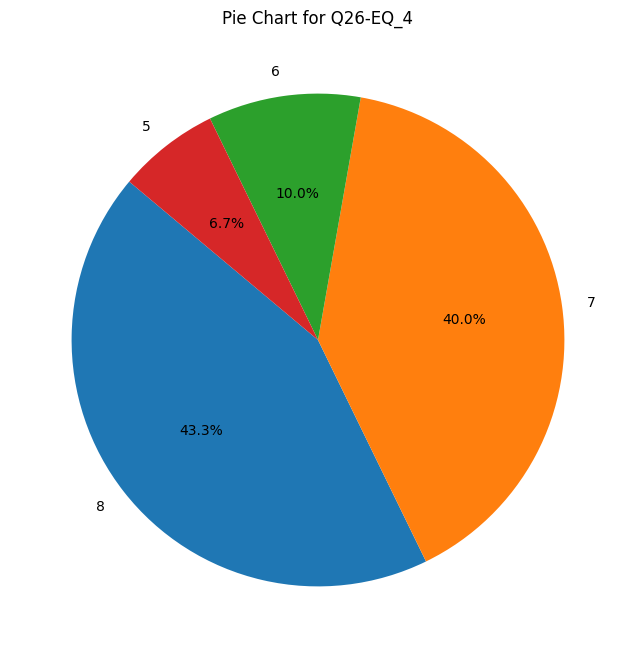

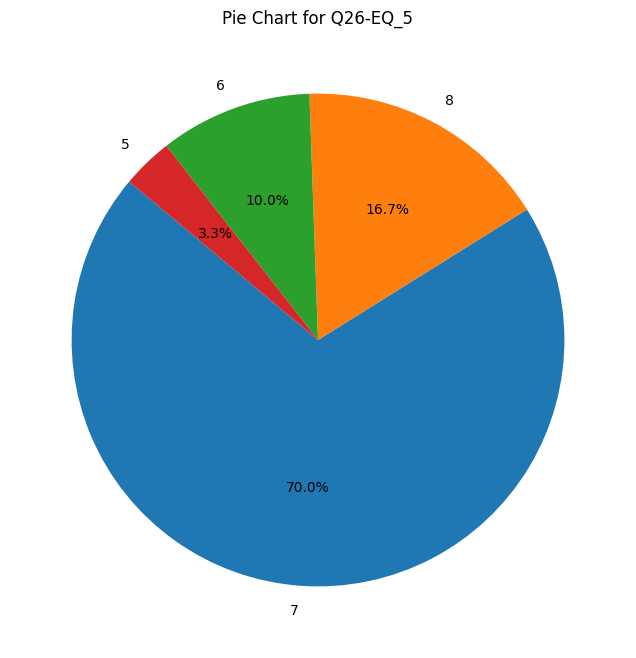

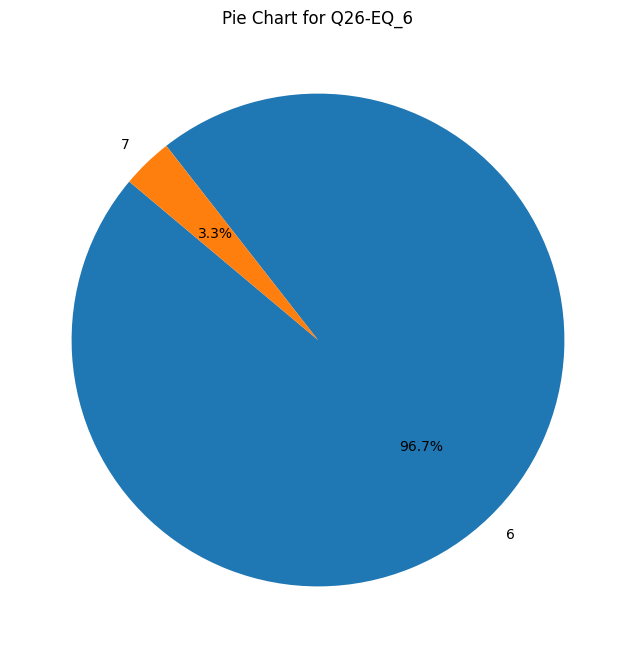

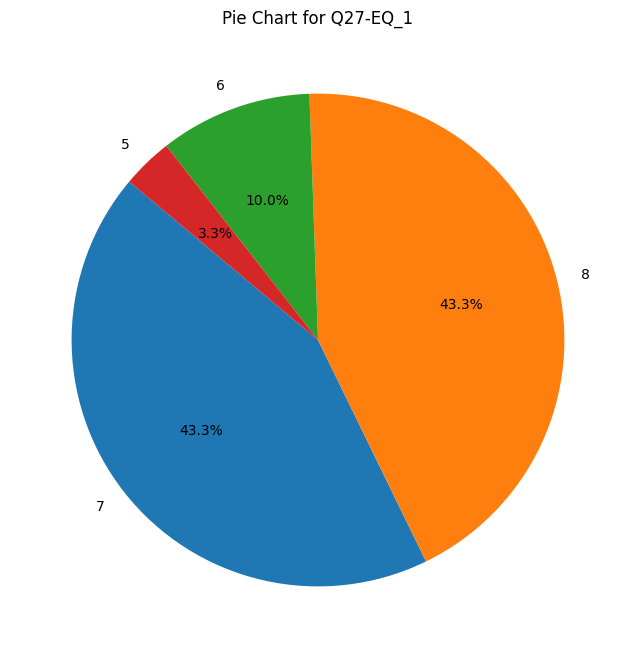

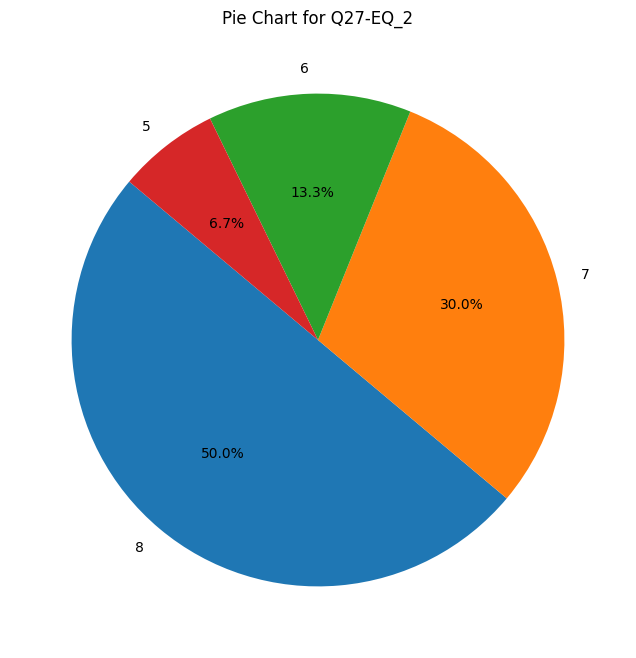

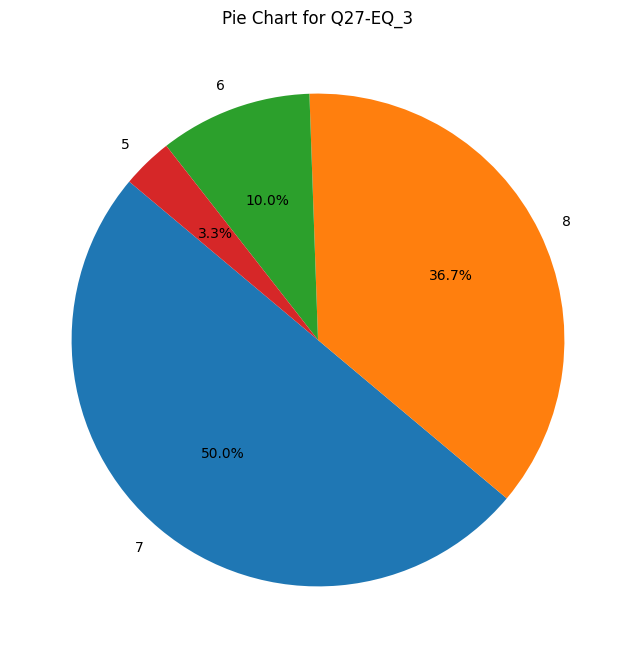

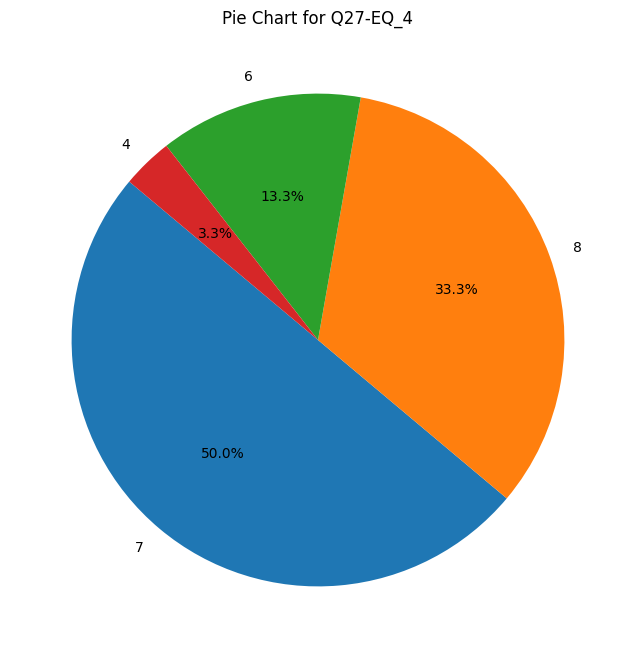

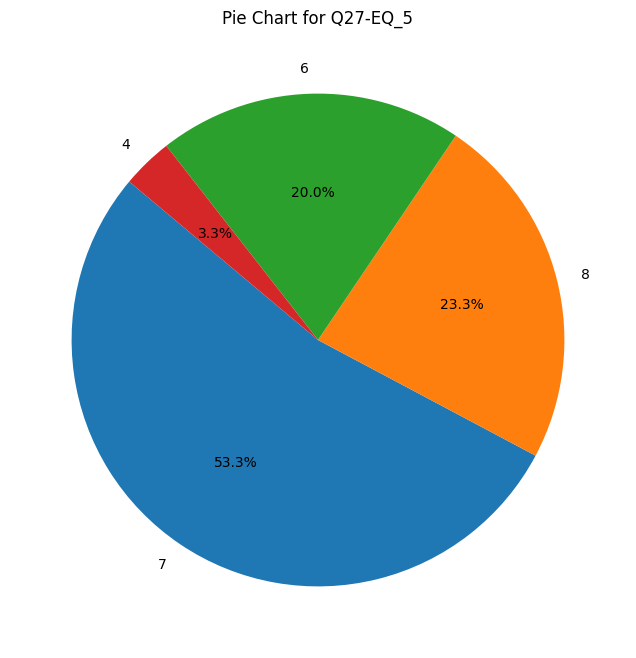

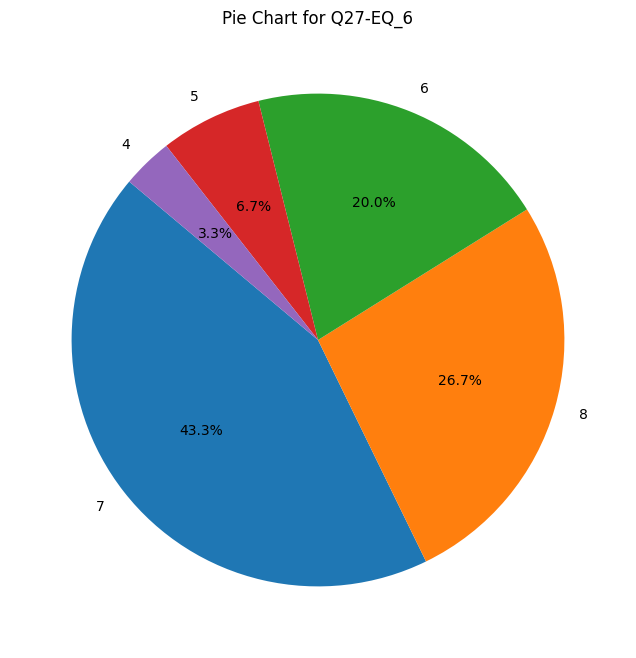

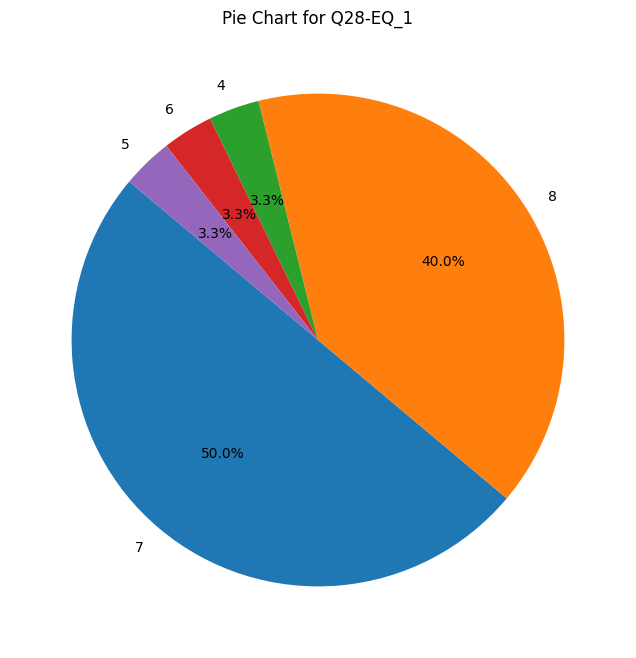

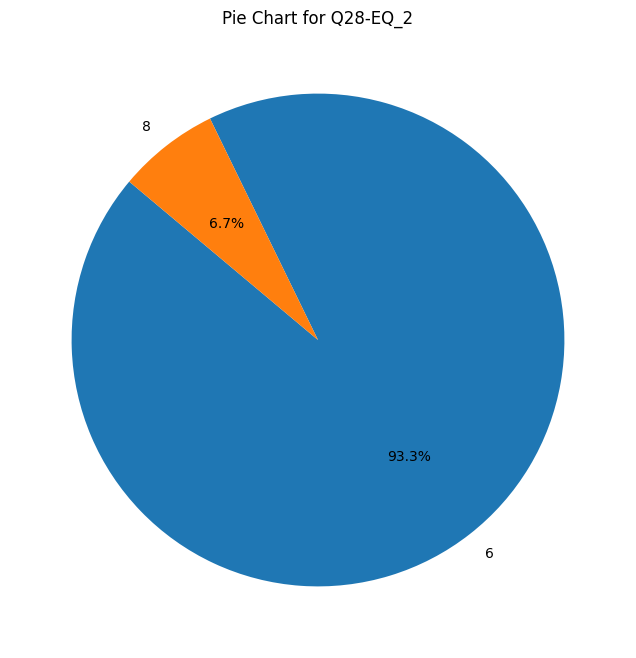

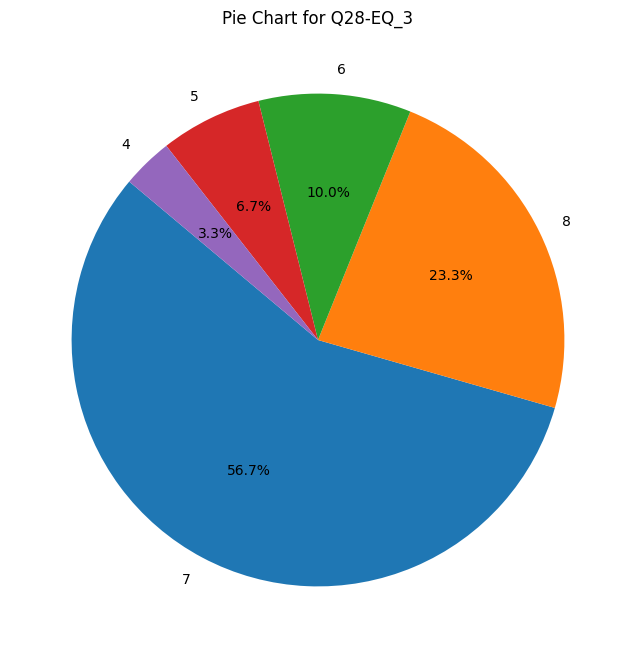

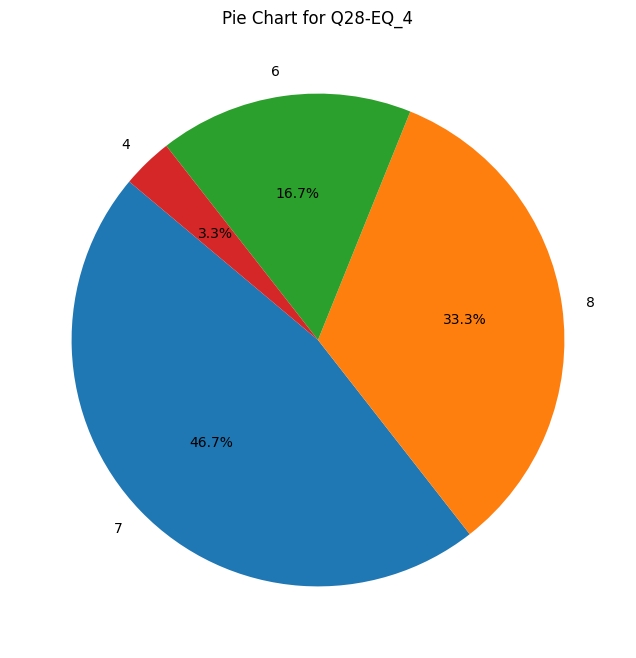

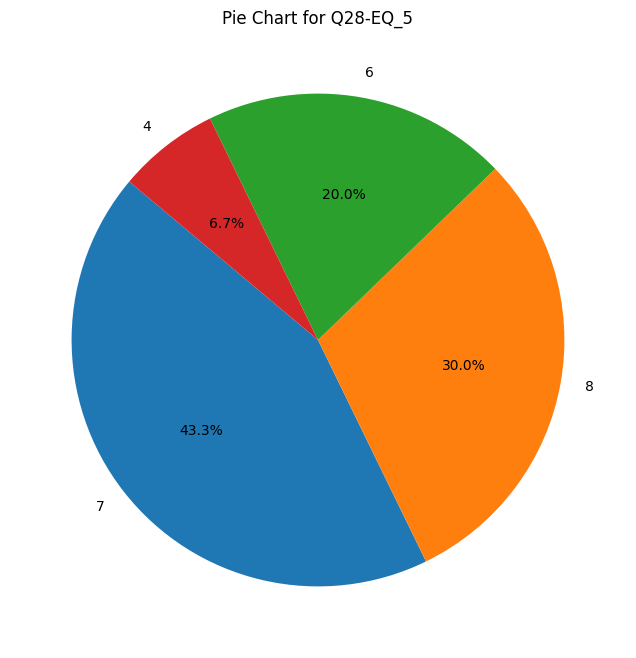

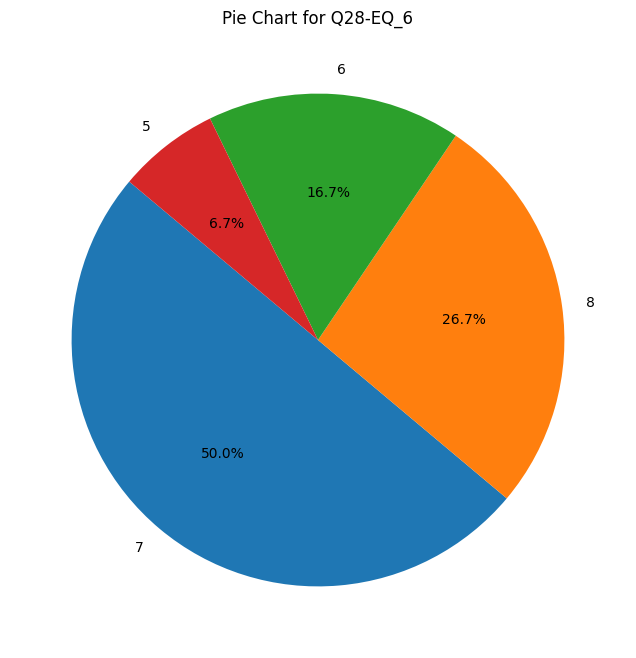

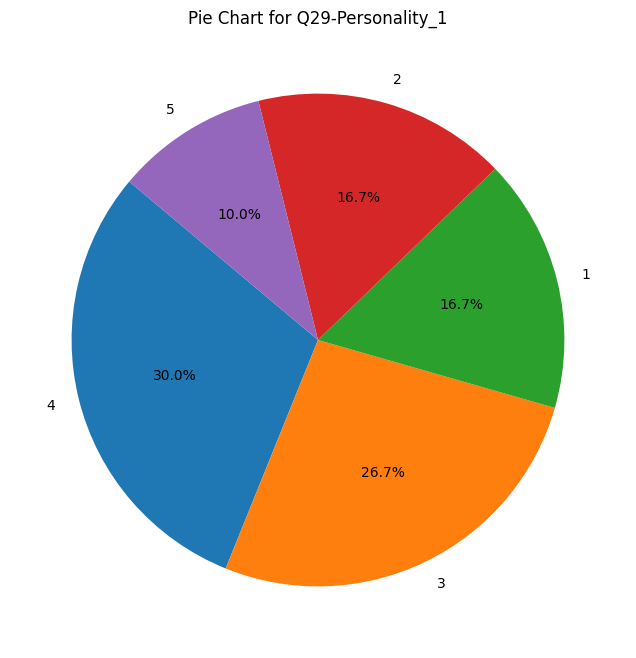

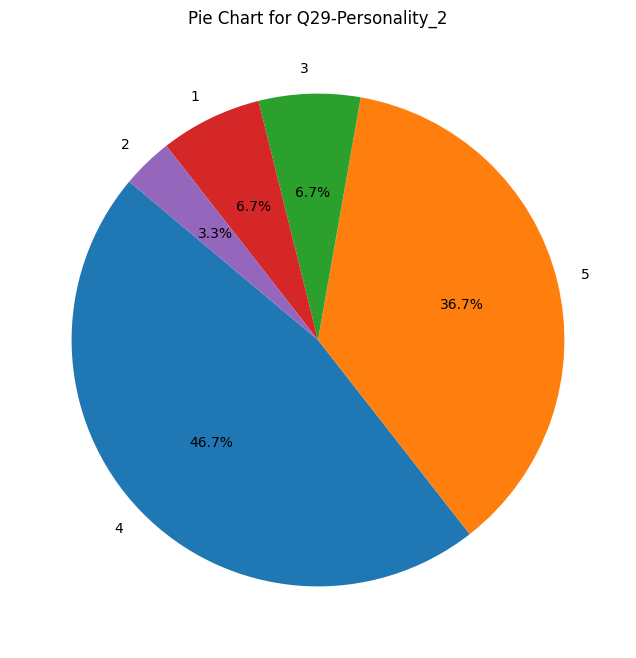

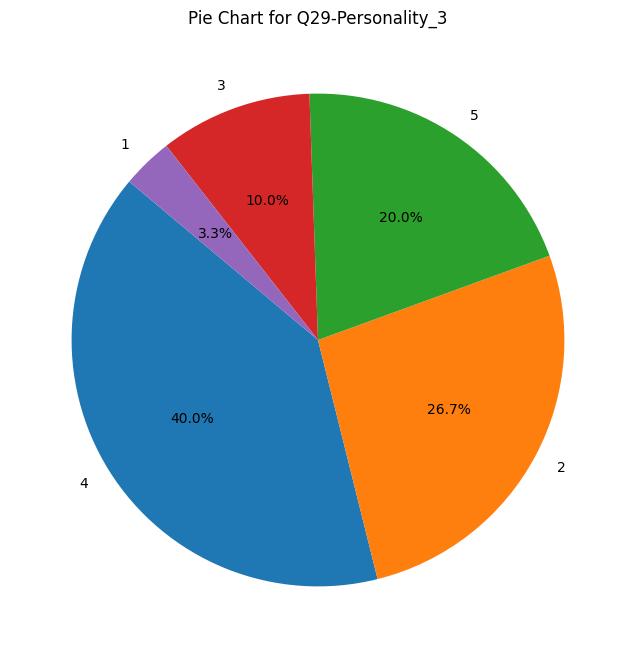

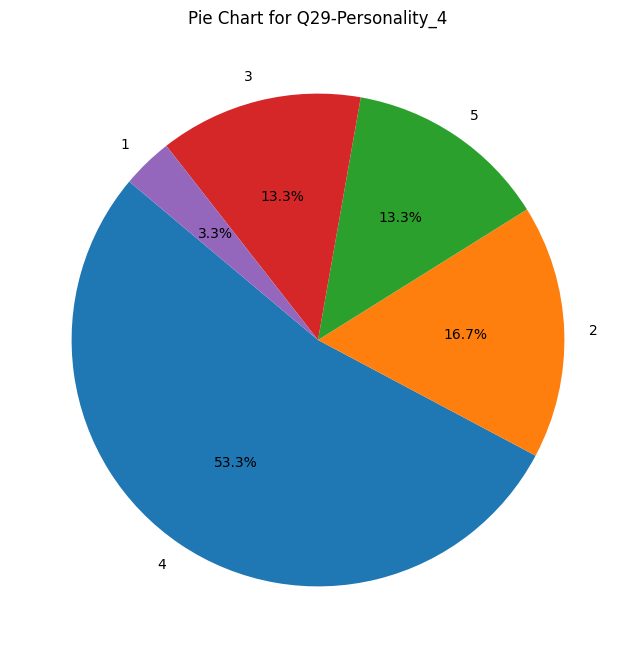

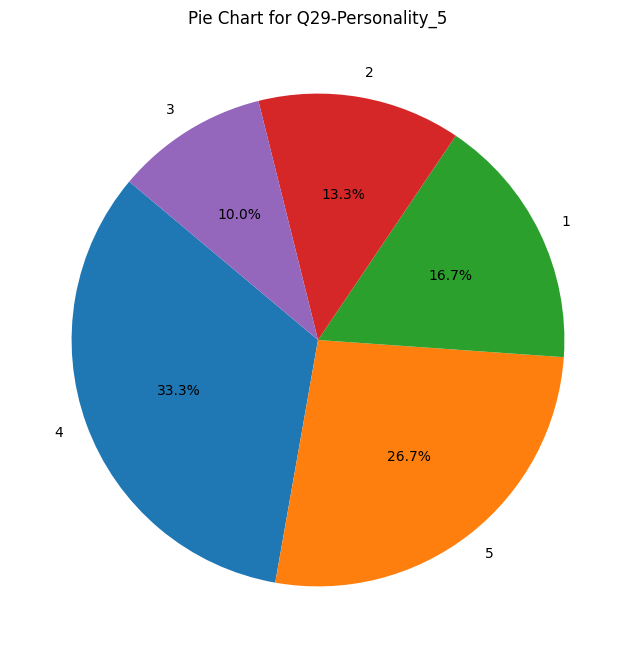

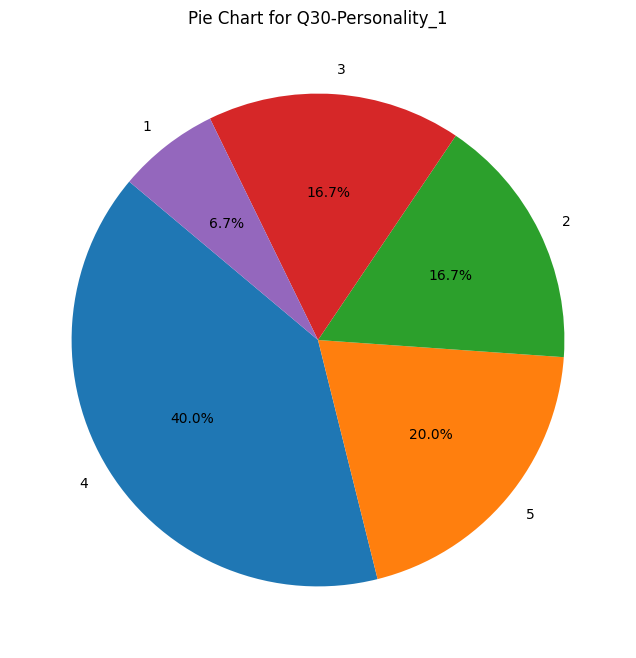

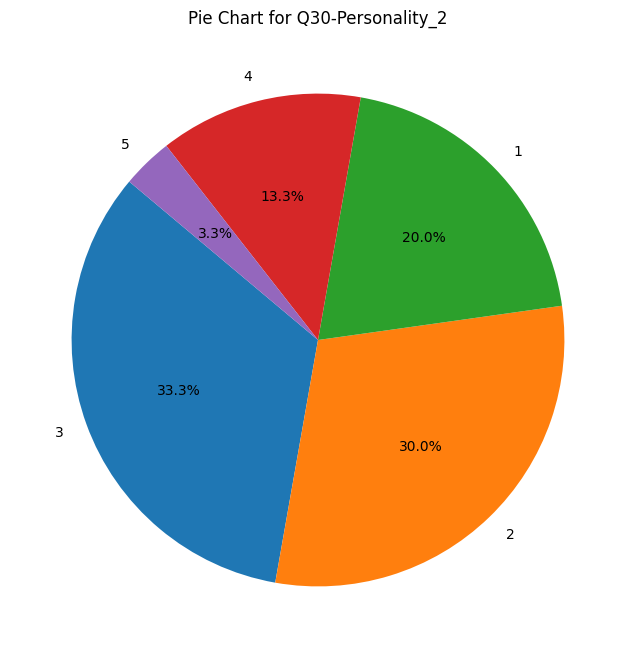

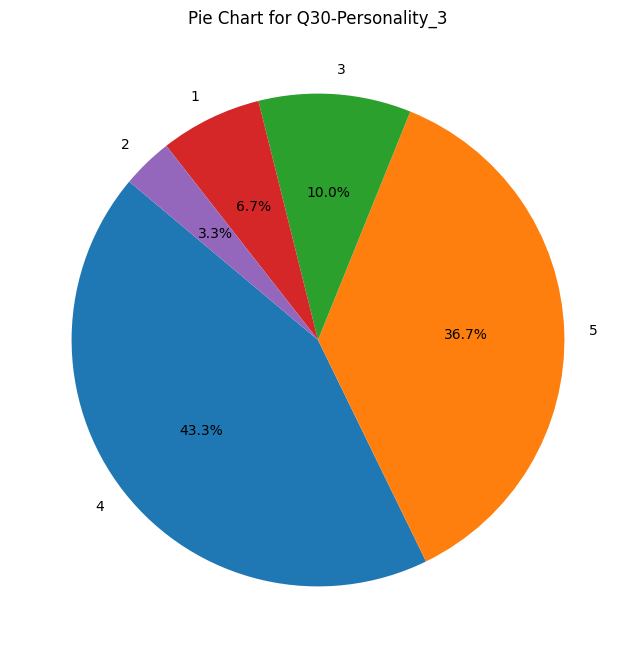

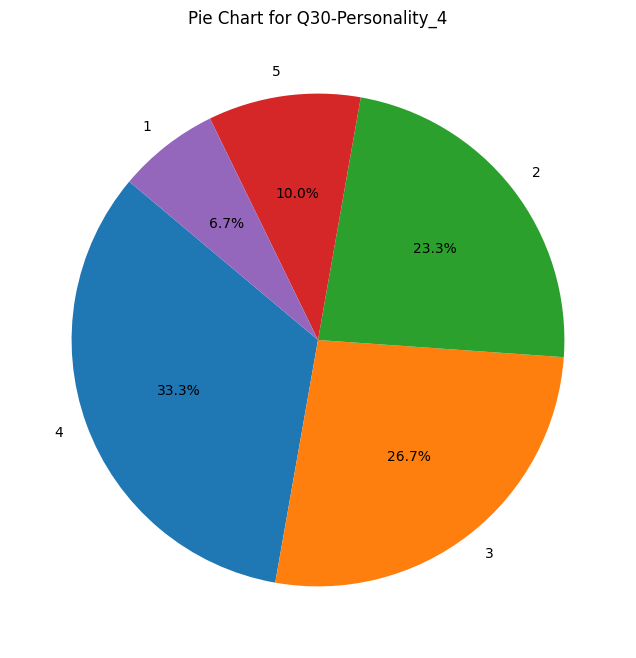

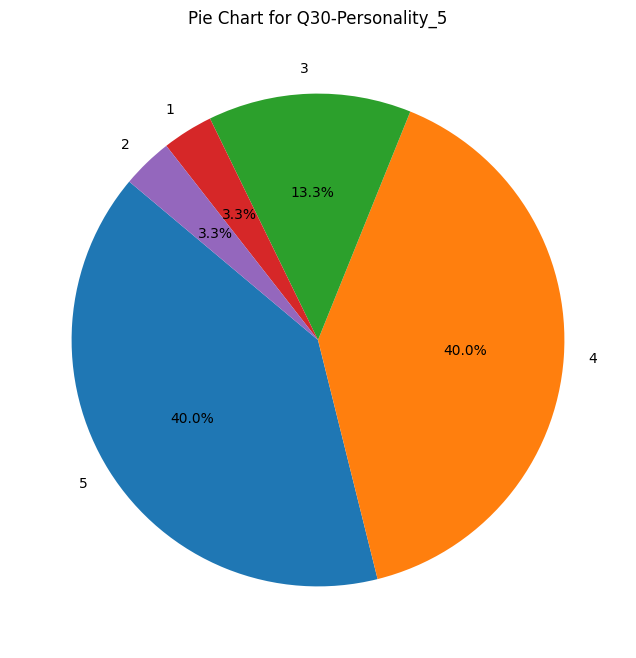

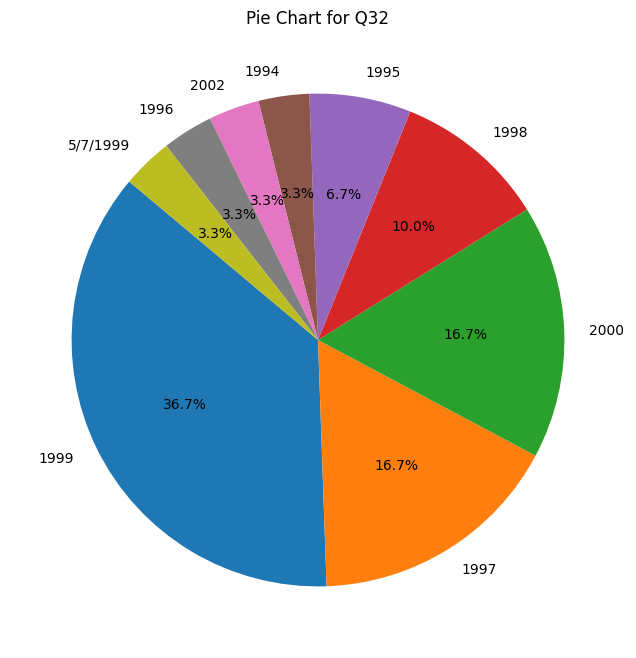

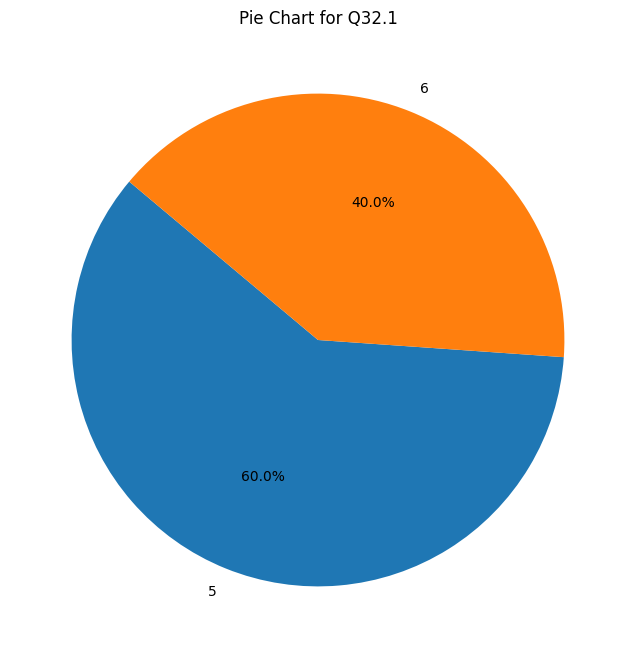

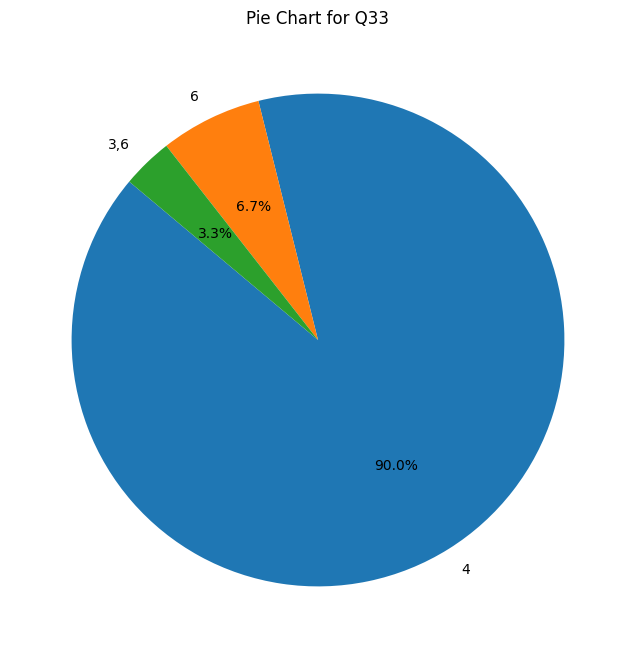

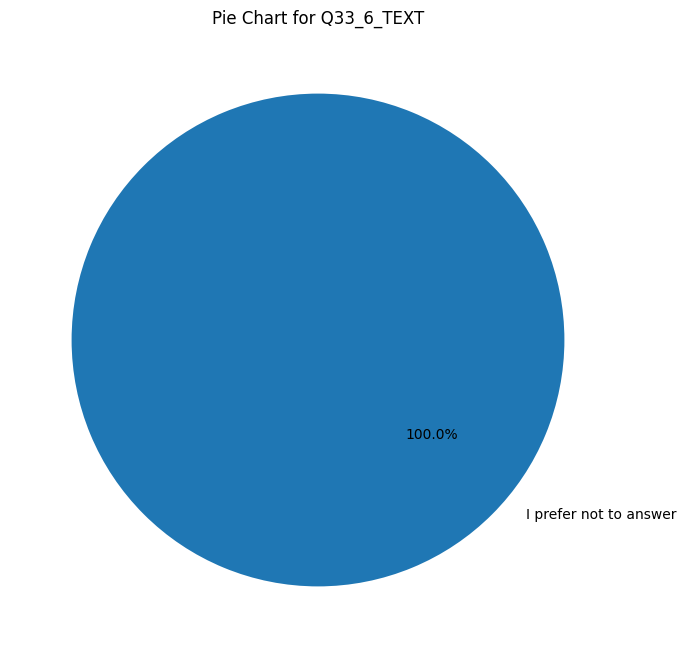

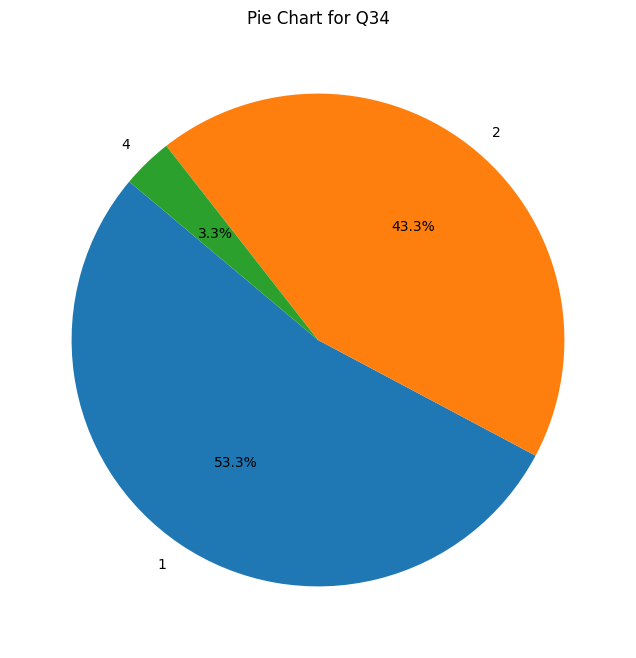

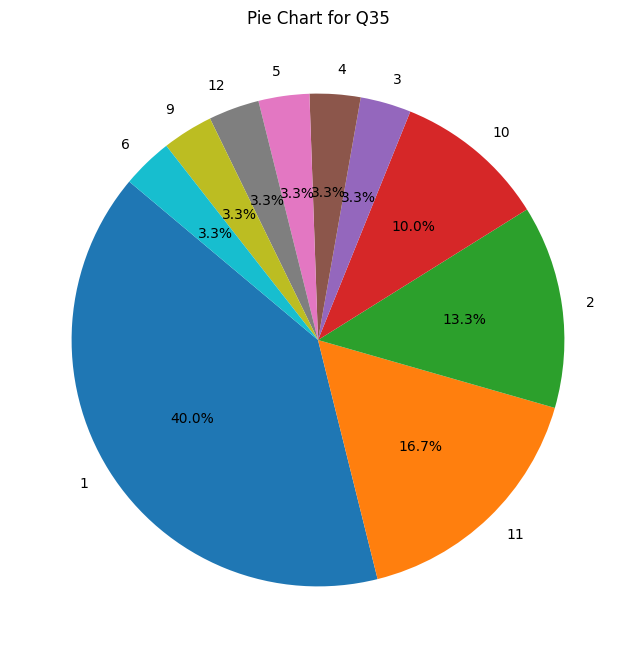

In [2]:
import matplotlib.pyplot as plt

# Filtering out columns that start with 'Q' and are likely related to question responses
question_columns = [col for col in data.columns if col.startswith('Q')]

# Generating pie charts for each question's answers
for col in question_columns:
    # Checking if the column is not entirely composed of NaN values
    if not data[col].isnull().all():
        # Counting the frequency of each response
        response_counts = data[col].value_counts()

        # Plotting the pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Pie Chart for {col}')
        plt.show()
    else:
        print(f"No data available for {col}.")



In [4]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF to save the plots
pdf_path = 'questionnaire_pie_charts.pdf'
with PdfPages(pdf_path) as pdf:
    for col in question_columns:
        # Checking if the column is not entirely composed of NaN values
        if not data[col].isnull().all():
            # Counting the frequency of each response
            response_counts = data[col].value_counts()

            # Plotting the pie chart
            plt.figure(figsize=(8, 8))
            plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
            plt.title(f'Pie Chart for {col}')
            
            # Save the current figure to pdf
            pdf.savefig()
            plt.close()
        else:
            print(f"No data available for {col}.")

# The path to the saved PDF
pdf_path


'questionnaire_pie_charts.pdf'

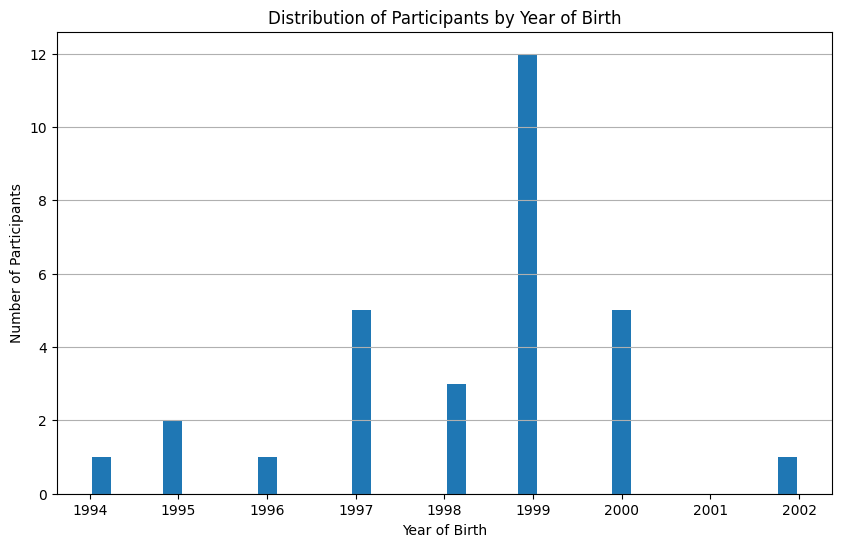

In [3]:
import matplotlib.pyplot as plt

# Convert the 'Q_32' column to numeric, handling non-numeric values
data['Q32'] = pd.to_numeric(data['Q32'], errors='coerce')

# Plotting a histogram for Date of Birth (Year)
plt.figure(figsize=(10, 6))
data['Q32'].dropna().plot(kind='hist', bins=30, rwidth=0.8)
plt.title('Distribution of Participants by Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Number of Participants')
plt.grid(axis='y')
plt.show()
 

In [4]:
# Counting occurrences of each education level in Q_32.1
education_counts = data['Q32.1'].value_counts()

# Displaying the counts
education_counts


Q32.1
5.0    18
6.0    12
Name: count, dtype: int64

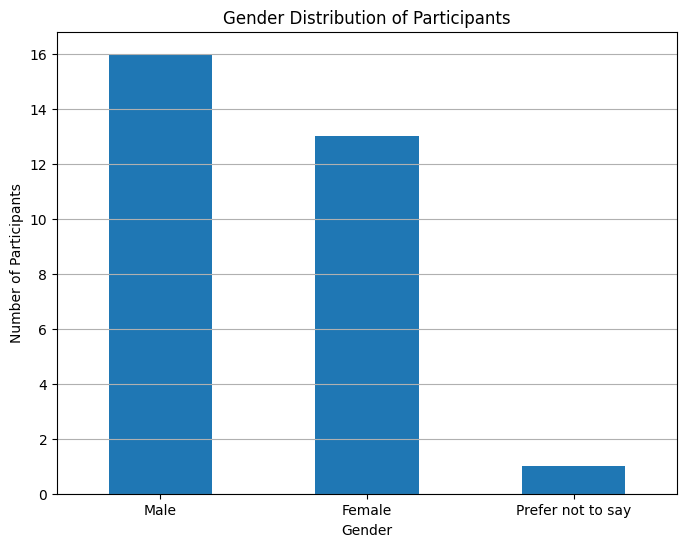

In [5]:
# Map the numeric values to gender categories
gender_map = {1: 'Male', 2: 'Female', 4: 'Prefer not to say'}
data['Gender'] = data['Q34'].map(gender_map)

# Counting the frequency of each gender category
gender_counts = data['Gender'].value_counts()

# Plotting a bar chart for Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('Gender Distribution of Participants')
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [9]:
chats_data = data['chats']

# Define a function to parse each chat string and extract the total duration and word count
def parse_chat(chat_str):
    try:
        # Extracting start and end times
        start_time_match = re.search(r'startTime: (\d{1,2}/\d{1,2}/\d{4} \d{1,2}:\d{1,2}:\d{1,2})', chat_str)
        end_time_match = re.search(r'timestamp: (\d{1,2}/\d{1,2}/\d{4} \d{1,2}:\d{1,2}:\d{1,2})', chat_str)

        # Parsing times and calculating total duration
        if start_time_match and end_time_match:
            start_time = datetime.strptime(start_time_match.group(1), "%m/%d/%Y %H:%M:%S")
            end_time = datetime.strptime(end_time_match.group(1), "%m/%d/%Y %H:%M:%S")
            total_duration = (end_time - start_time).seconds
        else:
            total_duration = None

        # Extracting and counting words in user messages
        user_messages = re.findall(r'{sender: user, content: (.*?)},', chat_str)
        total_words = sum(len(message.split()) for message in user_messages)

        return total_duration, total_words
    except Exception as e:
        return None, None

# Apply the parsing function to each chat in the dataset
parsed_chats = chats_data.apply(lambda x: parse_chat(x) if not pd.isnull(x) else (None, None))

# Split the results into separate columns
data['Total_Chat_Duration'] = parsed_chats.apply(lambda x: x[0])
data['Total_User_Words'] = parsed_chats.apply(lambda x: x[1])

# Save the results back into the CSV file
output_file_path = 'updated_dataraw.csv'
data.to_csv(output_file_path, index=False)

In [10]:
data['Total_Chat_Duration']


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
Name: Total_Chat_Duration, dtype: object

In [11]:
data['Total_User_Words']

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
Name: Total_User_Words, dtype: object